# Machine Learning / Aprendizagem Automática

## Sara C. Madeira, 2024/25

# AA Project  - Learning about Pet Adoption using PetFinder.my Dataset

### **GROUP #5**
- **Afonso Maria Mendes Vaz** - 64505
- **Matei-Alexandru Lupașcu** - 64471
- **Lloyd D'Silva** - 64858

## Introduction

This project focuses on analyzing the PetFinder.my Adoption Prediction dataset, a tabular dataset designed to predict the adoptability of pets based on various attributes. The original data comes from a Kaggle competition aimed at improving pet adoption rates through the application of machine learning. By understanding and predicting the adoption speed of pets, this project contributes to the development of AI tools that can guide shelters and rescuers in optimizing pet profiles, ultimately reducing animal suffering and euthanasia.

The dataset contains 14,993 instances and 24 features, which include attributes such as the pet's type, age, breed, color, size, vaccination status, and more. For this analysis, we will focus solely on tabular data, excluding image-based features.

**Objectives**:
Our primary goals for this project are as follows:

- Supervised Learning: Predict the adoption speed of pets using machine learning models, identifying the key factors influencing adoption rates.
- Unsupervised Learning: Group and characterize pets based on their adoption speed and shared attributes using clustering techniques.

To accomplish these objectives, we will use Python 3, leveraging libraries such as Scikit-learn for analysis.

The tasks include thorough data preprocessing, exploration, model building, and result discussion. Special attention will be given to addressing data imbalances, cleaning errors, and ensuring that key decisions and results are justified and critically discussed. By combining supervised and unsupervised learning techniques, we aim to derive insights that not only predict adoption speed but also provide actionable guidance for improving pet adoption profiles.

In [ ]:
!jupyter nbconvert --execute --to html "/content/AA20242505.ipynb"

[NbConvertApp] Converting notebook /content/AA20242505.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request


# Task 0 - Exploratory Data Analysis

In Task 0, we aim to study the dataset that we will be using in this project, with the aims to get an undersatnding of it that might aid us in future tasks. We will also be performing some general preprocessing in the dataset

## 0.1. Loading Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from joblib import parallel_backend
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('PetFinder_dataset.csv')

print("Dataset Loaded:")
print(data.head())

Dataset Loaded:
   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   


## 0.2. Understanding Data

#### 0.2.1. General Info about the dataset

- This will help us identify which columns are numerical or categorical.

In [ ]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-nul

In [ ]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed']
Categorical Features: ['Name', 'RescuerID', 'Description', 'PetID']


### 0.2.2. Statistical Summary

- Provides a high-level understanding of numerical data distribution and can help identify potential outliers or data inconsistencies.

In [ ]:
print("\nStatistical Summary of Numerical Columns:")
print(data.describe())


Statistical Summary of Numerical Columns:
               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std     

### 0.2.3. Missing Values

- This will identify how many missing values exist for each feature, so that we can treat them later.


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


### 0.2.4. Target Variable Distribution

- Understanding the target variables (AdoptionSpeed) is the primary goal of the project. This step helps us study it so we can have an overall idea of its distribution.

<ipython-input-8-d935e5143d24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AdoptionSpeed', data=data, palette='Set2')


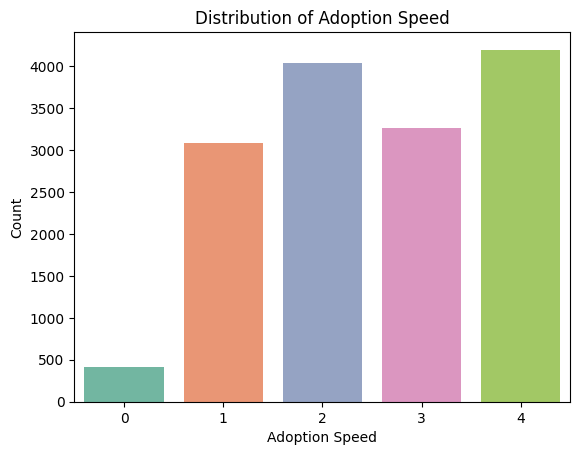

In [ ]:
sns.countplot(x='AdoptionSpeed', data=data, palette='Set2')
plt.title('Distribution of Adoption Speed')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()

### 0.2.5. Unique Values in Categorical Columns

- Some categorical features (e.g., 'Name', 'RescuerID') may have many unique values, making them unsuitable for direct encoding. This step helps us decide which fetures to include or transform.

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique()[:10])

Unique values in Name:
['Nibble' 'No Name Yet' 'Brisco' 'Miko' 'Hunter' nan 'BULAT'
 'Siu Pak & Her 6 Puppies' 'Kitty' 'Bear']
Unique values in RescuerID:
['8480853f516546f6cf33aa88cd76c379' '3082c7125d8fb66f7dd4bff4192c8b14'
 'fa90fa5b1ee11c86938398b60abc32cb' '9238e4f44c71a75282e62f7136c6b240'
 '95481e953f8aed9ec3d16fc4509537e8' '22fe332bf9c924d4718005891c63fbed'
 '1e0b5a458b5b77f5af581d57ebf570b3' '1fba5f6e5480946254590d48f9c5198d'
 'd8af7afece71334473575c9f70daf00d' '1f3f36e4b18e94855b3e88af0852fdc4']
Unique values in Description:
["Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care."
 'I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to

From this, we can see values that might be unsuitable, like for example, the value in the 'Name' category: 'No Name Yet'. This is not a suitable name and it would be much better off if we marked it as a null value.

## 0.3. Preprocessing Data

### 0.3.1. Handling Missing Values

- Missing values can lead to errors during model training or inaccurate predictions. As such, we will be replacing missing values for numerical features with the median and for categorical features with "Unknown".

In [ ]:
for col in numerical_features:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

for col in categorical_features:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna("Unknown")

### 0.3.2. Adding a new feature: Does the pet have a name?

- Pets with names might be perceived as more adoptable, therefore, we will create a new feature that checks if the pet has a name or not.

0 = The pet does not have a name.

1 = The pet does have a name.

In [ ]:
data['HasName'] = data['Name'].apply(lambda x: 0 if x == "Unknown" else 1)

### 0.3.3. Removing irrrelevant features

- Features like 'PetID','RescuerID','Description' and 'Name' don't have any significance in the time it takes for a pet to be adopted, so we decided to exclude these features.

Note: 'Name' is tricky, since the name of the pet itself might have an influence of their adoptiveness, however, it is difficult to quantify the effectiveness of the name. Therefore we will not be vieweing each individual name. We will study ***if*** a pet has a name or not and check the effectiveness of a pet having a name.

In [ ]:
irrelevant_features = ['PetID','RescuerID', 'Description', 'Name']
data.drop(columns=irrelevant_features, inplace=True)

# Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this supervised learning task, we’ll tackle three classification problems:

- 1. **Predicting Adoption (Binary Classification)**: We’ll create a binary target from the AdoptionSpeed feature. The new target will be 1 if AdoptionSpeed is not 4 (adopted), and 0 otherwise (not adopted).

- 2. **Predicting AdoptionSpeed (Multiclass Classification)**: We’ll predict the original AdoptionSpeed values, which range from {0, 1, 2, 3, 4}. We may also try grouping classes into 3 categories, such as {0-1}, {2-3}, and {4}, if it improves performance.

- 3. **Training Specialized Models for Cats and Dogs**: We’ll train separate models for cats and dogs and evaluate whether species-specific models improve prediction accuracy for both binary and multiclass classification tasks.

For each task, we’ll select five classifiers from at least three categories: Tree models, Probabilistic models, Distance-based models, and Linear models. Models like decision trees, k-nearest neighbors, logistic regression, and support vector machines will be explored.

We’ll utilize cross-validation to evaluate performance and report results with metrics like accuracy, precision, recall, F1-score, and confusion matrices, while also describing the chosen parameters and their impacts.

Finally, we’ll select the best classifier based on performance and justify our choices, reflecting on model selection, parameter tuning, and trade-offs between accuracy and other factors.

## 1.1. Learning and Evaluating Classifiers

For each classifier, we will:

- Train the model using cross-validation.
- Compute evaluation metrics: accuracy, precision, etc...
- Generate and analyze confusion matrices.


### 1.1.1. Predicting Adoption (Binary Classification)



0. **Preprocessing**

For Binary classification, we will perform the following preprocessing taks:

- Create a Binary Target Variable 'Adoption', such that:

  - 'Adoption' = 1 if 'AdoptionSpeed' != 4 (pet adopted at any speed).
  - 'Adoption' = 0 if 'AdoptionSpeed' == 4 (pet not adopted).

- Split the data into training and testing sets.

In [ ]:
# Create the Adoption column
data['Adoption'] = data['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)

features = data.drop(columns=['AdoptionSpeed','Adoption'])
target = data['Adoption']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (11994, 20), Test set size: (2999, 20)


We'll check the class distribution to see if there is an imbalance regarding the target variable.

In [ ]:
print("Class distribution in training data:")
print(y_train.value_counts())

Class distribution in training data:
Adoption
1    8630
0    3364
Name: count, dtype: int64


Since there isn't a largely imbalanced distribution, we won't need to perform any resampling strategies. However, since we aim to predict if an animal will be adopted or not, we must take into account the slight imbalance between the two classes (0 = Not Adopted, 1 = Adopted). As such, for the binary classifications, we will be applying class weights with hopes to fix this slight imbalance.


1. **K-Nearest Neighbors (KNN) Method**

The KNN does not have a direct "class_weight" parameter. Instead, we will adjust the weights manually by oversampling the minority class using a technique called SMOTE.

**Parameters**:
- n_neighbors = 5: The number of nearest neighbors used for classification. Increasing or decreasing this parameter would affect the smoothness of the decision boundary.
- Distance Metric: KNN uses the deafukt Euclidean distance
- Cross-Validation (KFold): We employed a 5-fold cross-validation strategy to assess model performnace during training.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


KNN Accuracy after SMOTE: 0.7067
KNN Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47       833
           1       0.80      0.69      0.74      2166

    accuracy                           0.65      2999
   macro avg       0.60      0.62      0.61      2999
weighted avg       0.69      0.65      0.67      2999



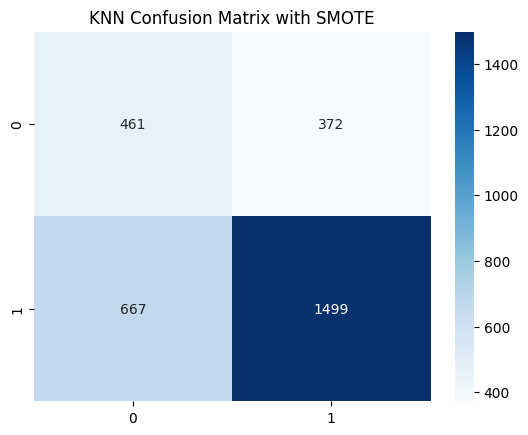

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)

k_folds = KFold(n_splits=5)
knn_scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=k_folds, scoring='accuracy')
print(f"KNN Accuracy after SMOTE: {knn_scores.mean():.4f}")

knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix with SMOTE')
plt.show()

2. **Naive Bayes**

The Naive Bayes classifier used in this study was the GaussianNB implementation, which assumes that the features follow a Gaussian (normal) distribution. The "GaussianNB" model was trained using the resampled dataset.

Much like KNN, Naive Bayes does not support a "class_weight" parameter. So, to adjust for class imbalance, we will once again be using SMOTE.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Naive Bayes Accuracy with SMOTE: 0.5566
Naive Bayes Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.34      0.61      0.44       833
           1       0.79      0.55      0.65      2166

    accuracy                           0.57      2999
   macro avg       0.56      0.58      0.54      2999
weighted avg       0.66      0.57      0.59      2999



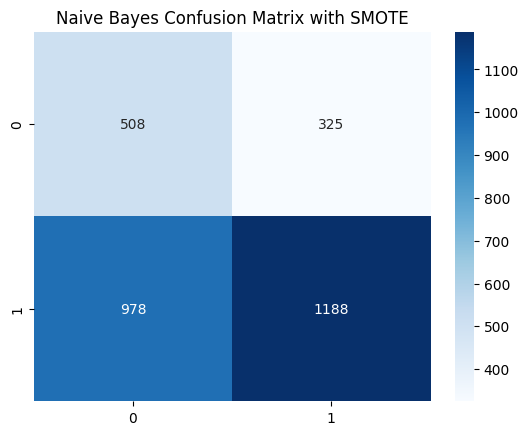

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb = GaussianNB()

k_folds = KFold(n_splits=5)
nb_scores = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=k_folds, scoring='accuracy')
print(f"Naive Bayes Accuracy with SMOTE: {nb_scores.mean():.4f}")

nb.fit(X_train_resampled, y_train_resampled)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_nb))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix with SMOTE')
plt.show()

3. **Logistic Regression**

**Parameters**:

- max_iter=1000: The maximum number of iterations for the optimization solver. Setting this parameter to a high value guarantees improved stability.
- random_state=42: for reproducibility

- class_weight='balanced': This adjusts the weights assigned to each class inversely proportional to their frequencies in the training data.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy with Class Weights: 0.6180


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report (with Class Weights):
              precision    recall  f1-score   support

           0       0.39      0.64      0.49       833
           1       0.82      0.62      0.70      2166

    accuracy                           0.62      2999
   macro avg       0.60      0.63      0.60      2999
weighted avg       0.70      0.62      0.64      2999



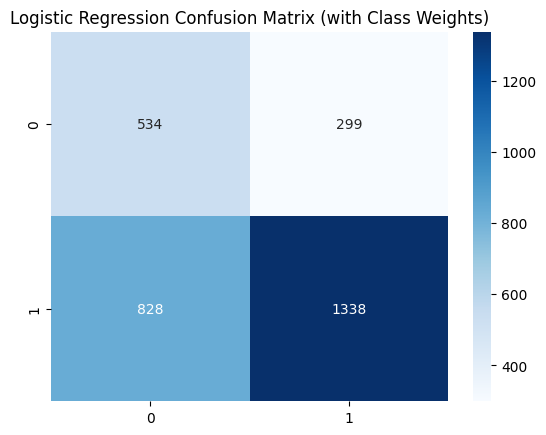

In [ ]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Accuracy with Class Weights: {lr_scores.mean():.4f}")

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classification Report (with Class Weights):")
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix (with Class Weights)')
plt.show()

4. **Decision Tree**

Decision Tree Accuracy (with Weights): 0.6728
Decision Tree Classification Report (with Class Weights):
              precision    recall  f1-score   support

           0       0.43      0.44      0.43       833
           1       0.78      0.77      0.78      2166

    accuracy                           0.68      2999
   macro avg       0.60      0.61      0.60      2999
weighted avg       0.68      0.68      0.68      2999



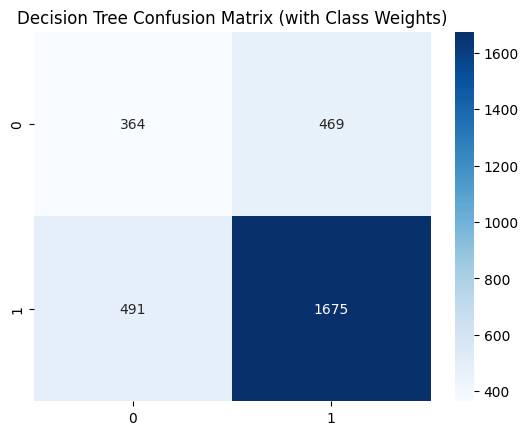

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Accuracy (with Weights): {dt_scores.mean():.4f}")

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report (with Class Weights):")
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix (with Class Weights)')
plt.show()

5. **SVM**

The LinearSVC implementatiom uses a linear kernal, which assumes that the data is linearly separable.

SVM Accuracy: 0.6164
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.65      0.49       833
           1       0.82      0.62      0.71      2166

    accuracy                           0.63      2999
   macro avg       0.61      0.63      0.60      2999
weighted avg       0.70      0.63      0.65      2999



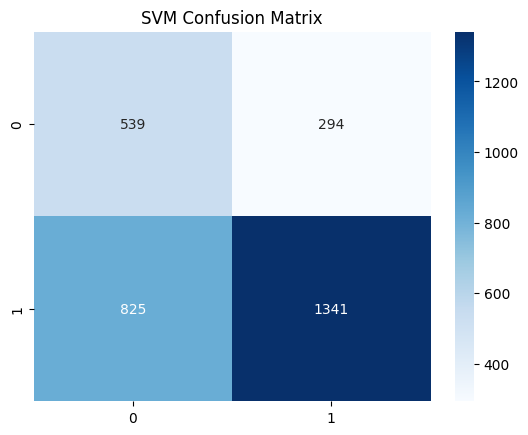

In [ ]:
svm = LinearSVC(random_state=42, max_iter=5000, class_weight="balanced")

with parallel_backend('loky'):
    svm_scores = cross_val_score(svm, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(f"SVM Accuracy: {svm_scores.mean():.4f}")

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

6. **Compare Classifier Performances**:

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [lr_scores.mean(), nb_scores.mean(), knn_scores.mean(), dt_scores.mean(), svm_scores.mean()]
}
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.617976
1          Naive Bayes  0.556605
2                  KNN  0.706721
3        Decision Tree  0.672837
4                  SVM  0.616392


**Insights**

- KNN: Perfroms best overall, with strong performance for both classes, making it a good choice if accuracy is critical.

- Logistic Regression & SVM: These models offer the most balanced perfromance, making them ideal to treath both classes equally.

- Decision Tree: Offers balanced and interpretable results, with a slight bias towards class 1.

- Naive Bayes: Weakest performer.

Based on the results, since there is an equal emphasis placed on both classes, **Logistic Regression** or **SVM** are the best choices, since they have high recall for class 0 and balanced f-1 scores.

### 1.1.2. Predicting AdoptionSpeed (Multiclass Classification)

0. **Preprocessing**

For multiclassification, we decided that, instead of classifying 5 different classes in 'AdoptionSpeed' (0,1,2,3,4), it would be best to group these together, and classify only 3 classes.

As such, we created a new variable called 'AdoptionSpeed3', to signify the 3 classes, which correspond to the following:
- Class 0: AdoptionSpeed 0 and 1 (very fast adoptions)
- Class 1: AdoptionSpeed 2 and 3 (moderately fast adoptions)
- Class 2: AdoptionSpeed 4 (Not adopted yet).


In [ ]:
multiclass_data = data.copy()

multiclass_data['AdoptionSpeed_3classes'] = multiclass_data['AdoptionSpeed'].apply(
    lambda x: 0 if x in [0, 1] else (1 if x in [2, 3] else 2)
)
target_multiclass = multiclass_data['AdoptionSpeed_3classes']

In [ ]:
features = multiclass_data.drop(columns=['AdoptionSpeed', 'Adoption', 'AdoptionSpeed_3classes'])

In [ ]:
print("AdoptionSpeed Class Distribution:")
print(target_multiclass.value_counts())

AdoptionSpeed Class Distribution:
AdoptionSpeed_3classes
1    7296
2    4197
0    3500
Name: count, dtype: int64


In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    features, target_multiclass, test_size=0.2, random_state=42
)

It is important to note that, for this multiclassification task, during cross-validation, we computed confusion matrices to examine the classifier's performance across all folds. Throughout the training process, this method offers a thorough analysis of the true positives, false negatives, and other prediction errors for every class. We can obtain a comprehensive understanding of the model's advantages and disadvantages by combining predictions from all folds, especially its capacity to manage class imbalances and prevent misclassification.

1. **K-Nearest Neighbors (KNN) Method**

**Parameters**:
- n_neighbors: Tested values of 3, 5, 7, 9, and 11 to determine the best number of neighbors to consider for classification.
- weights: The model was tested with both uniform (equal weight for each neighbor) and distance (closer neighbors have more influence) weighting schemes.
- metric: Different distance metrics(Euclidean, Manhattan, and Minkowski) were evaluated to find the best measure of similarity.

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
KNN Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.36      0.26      0.31      2781
           1       0.54      0.69      0.61      5849
           2       0.51      0.39      0.44      3364

    accuracy                           0.51     11994
   macro avg       0.47      0.45      0.45     11994
weighted avg       0.49      0.51      0.49     11994

KNN Accuracy (Test Set): 0.5081693897965989
KNN Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.36      0.25      0.30       719
           1       0.53      0.69      0.60      1447
           2       0.54      0.42      0.47       833

    accuracy                           0.51      2999
   macro avg       0.48      0.45      0.46      2999
weighted avg 

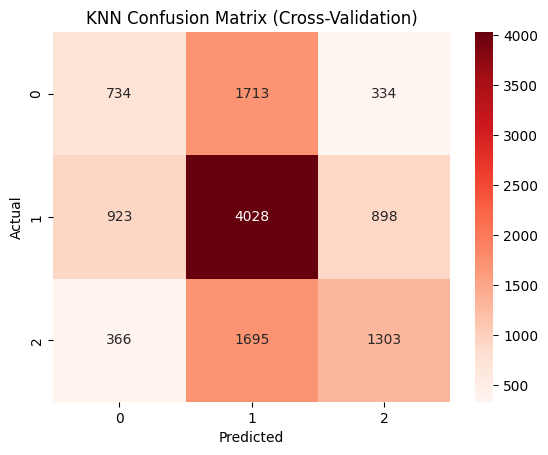

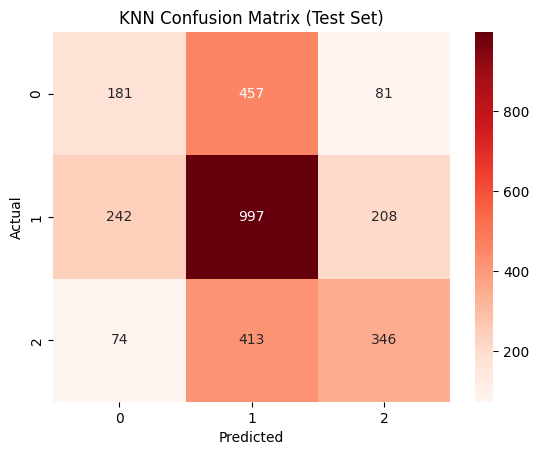

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_multiclass, y_train_multiclass)

best_knn = grid_search.best_estimator_
print("Best parameters for KNN:", grid_search.best_params_)

y_pred_cv = cross_val_predict(best_knn, X_train_multiclass, y_train_multiclass, cv=3)
print("KNN Classification Report (Cross-Validation):")
print(classification_report(y_train_multiclass, y_pred_cv))

y_pred_test = best_knn.predict(X_test_multiclass)
print("KNN Accuracy (Test Set):", best_knn.score(X_test_multiclass, y_test_multiclass))
print("KNN Classification Report (Test Set):")
print(classification_report(y_test_multiclass, y_pred_test))

conf_matrix_cv = confusion_matrix(y_train_multiclass, y_pred_cv)
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Reds')
plt.title('KNN Confusion Matrix (Cross-Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

conf_matrix_test = confusion_matrix(y_test_multiclass, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('KNN Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. **Naive Bayes**

GaussianNB is used here due to the assumption that the features follow a Gaussian distribution, which is often a reasonable assumption for features like age and fee.


Naive Bayes Accuracy (Cross-Validation): 0.4564
Naive Bayes Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.33      0.39      0.35      2781
           1       0.54      0.58      0.56      5849
           2       0.42      0.29      0.34      3364

    accuracy                           0.46     11994
   macro avg       0.43      0.42      0.42     11994
weighted avg       0.46      0.46      0.45     11994



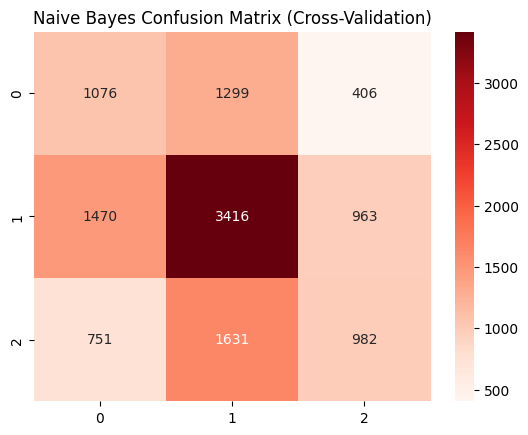

Naive Bayes Accuracy (Test Set): 0.4555
Naive Bayes Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.35      0.40      0.38       719
           1       0.52      0.59      0.55      1447
           2       0.41      0.26      0.32       833

    accuracy                           0.46      2999
   macro avg       0.43      0.42      0.42      2999
weighted avg       0.45      0.46      0.45      2999



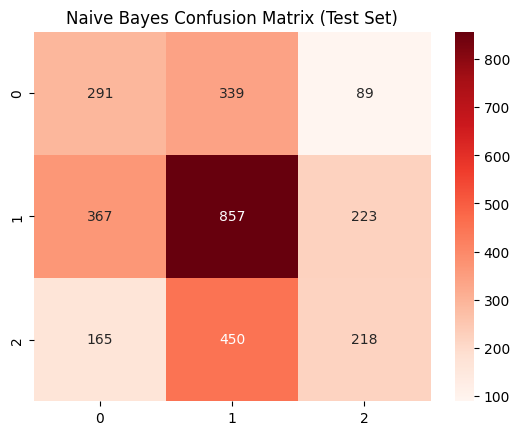

In [ ]:
nb = GaussianNB()

y_pred_cv_nb = cross_val_predict(nb, X_train_multiclass, y_train_multiclass, cv=3, n_jobs=-1)

cv_accuracy_nb = (y_pred_cv_nb == y_train_multiclass).mean()
print(f"Naive Bayes Accuracy (Cross-Validation): {cv_accuracy_nb:.4f}")

print("Naive Bayes Classification Report (Cross-Validation):")
print(classification_report(y_train_multiclass, y_pred_cv_nb))

cv_conf_matrix_nb = confusion_matrix(y_train_multiclass, y_pred_cv_nb)
sns.heatmap(cv_conf_matrix_nb, annot=True, fmt='d', cmap='Reds')
plt.title("Naive Bayes Confusion Matrix (Cross-Validation)")
plt.show()

nb.fit(X_train_multiclass, y_train_multiclass)
y_pred_nb_test = nb.predict(X_test_multiclass)

test_accuracy_nb = (y_pred_nb_test == y_test_multiclass).mean()
print(f"Naive Bayes Accuracy (Test Set): {test_accuracy_nb:.4f}")

print("Naive Bayes Classification Report (Test Set):")
print(classification_report(y_test_multiclass, y_pred_nb_test))

test_conf_matrix_nb = confusion_matrix(y_test_multiclass, y_pred_nb_test)
sns.heatmap(test_conf_matrix_nb, annot=True, fmt='d', cmap='Reds')
plt.title("Naive Bayes Confusion Matrix (Test Set)")
plt.show()

3. **Logistic Regression**

- multi_class='multinomial': This parameter allows the model to handle multiclass problems using the multinomial loss, making it suitable for more than two classes.
- solver='lbfgs': The LBFGS solver (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is used, which is efficient for large datasets and works well for multinomial logistic regression.
- max_iter=500: The maximum number of iterations is set to 500.
- random_state=42: Ensures reproducibility of results.

Logistic Regression Accuracy (Cross-Validation): 0.4894
Logistic Regression Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.33      0.02      0.03      2781
           1       0.49      0.95      0.65      5849
           2       0.49      0.08      0.13      3364

    accuracy                           0.49     11994
   macro avg       0.44      0.35      0.27     11994
weighted avg       0.45      0.49      0.36     11994



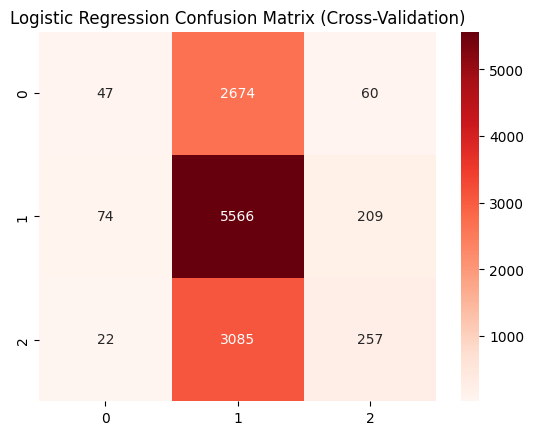

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy (Test Set): 0.4795
Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.22      0.01      0.02       719
           1       0.48      0.94      0.64      1447
           2       0.50      0.08      0.13       833

    accuracy                           0.48      2999
   macro avg       0.40      0.34      0.26      2999
weighted avg       0.42      0.48      0.35      2999



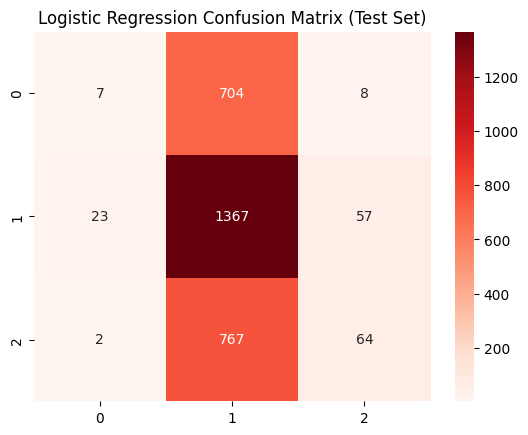

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

y_pred_cv_log_reg = cross_val_predict(log_reg, X_train_multiclass, y_train_multiclass, cv=3, n_jobs=-1)

cv_accuracy_log_reg = (y_pred_cv_log_reg == y_train_multiclass).mean()
print(f"Logistic Regression Accuracy (Cross-Validation): {cv_accuracy_log_reg:.4f}")

print("Logistic Regression Classification Report (Cross-Validation):")
print(classification_report(y_train_multiclass, y_pred_cv_log_reg))

cv_conf_matrix_log_reg = confusion_matrix(y_train_multiclass, y_pred_cv_log_reg)
sns.heatmap(cv_conf_matrix_log_reg, annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression Confusion Matrix (Cross-Validation)")
plt.show()

log_reg.fit(X_train_multiclass, y_train_multiclass)
y_pred_log_reg_test = log_reg.predict(X_test_multiclass)

test_accuracy_log_reg = (y_pred_log_reg_test == y_test_multiclass).mean()
print(f"Logistic Regression Accuracy (Test Set): {test_accuracy_log_reg:.4f}")

print("Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test_multiclass, y_pred_log_reg_test))

test_conf_matrix_log_reg = confusion_matrix(y_test_multiclass, y_pred_log_reg_test)
sns.heatmap(test_conf_matrix_log_reg, annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression Confusion Matrix (Test Set)")
plt.show()

4. **Decision Tree**

**Parameters**:
- 'max_depth': Limits the depth of the tree to prevent overfitting.
- 'min_samples_slipt': Specifies the minimum number of samples required to split a node.
- 'min_samples_leaf': Ensures a minimum number of samples at a leaf node, further reducing overfitting.
- 'class_weight': Addresses class imbalance
- 'criterion': Controls the splitting strategy (entropy)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy (Cross-Validation): 0.5163
Decision Tree Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.32      0.00      0.01      2781
           1       0.53      0.78      0.63      5849
           2       0.49      0.48      0.48      3364

    accuracy                           0.52     11994
   macro avg       0.45      0.42      0.37     11994
weighted avg       0.47      0.52      0.44     11994



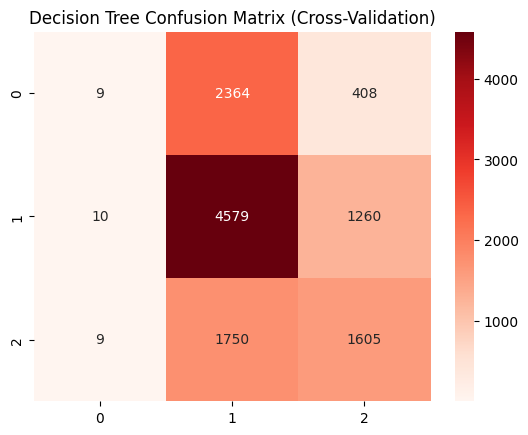

Decision Tree Accuracy (Test Set): 0.5215071690563521
Decision Tree Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.20      0.01      0.01       719
           1       0.52      0.81      0.64      1447
           2       0.52      0.47      0.49       833

    accuracy                           0.52      2999
   macro avg       0.42      0.43      0.38      2999
weighted avg       0.45      0.52      0.45      2999



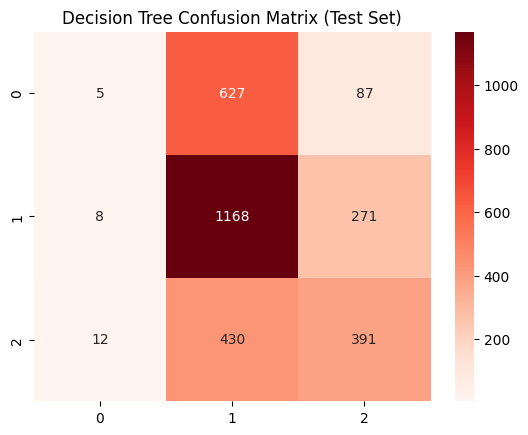

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_multiclass, y_train_multiclass)

best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_cv = cross_val_predict(best_tree, X_train_multiclass, y_train_multiclass, cv=3, n_jobs=-1)

cv_accuracy = accuracy_score(y_train_multiclass, y_pred_cv)
print(f"Decision Tree Accuracy (Cross-Validation): {cv_accuracy:.4f}")

print("Decision Tree Classification Report (Cross-Validation):")
print(classification_report(y_train_multiclass, y_pred_cv))

cv_conf_matrix = confusion_matrix(y_train_multiclass, y_pred_cv)
sns.heatmap(cv_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Decision Tree Confusion Matrix (Cross-Validation)')
plt.show()

y_pred_best_tree = best_tree.predict(X_test_multiclass)

test_accuracy = accuracy_score(y_test_multiclass, y_pred_best_tree)
print("Decision Tree Accuracy (Test Set):", test_accuracy)

print("Decision Tree Classification Report (Test Set):")
print(classification_report(y_test_multiclass, y_pred_best_tree))

test_conf_matrix = confusion_matrix(y_test_multiclass, y_pred_best_tree)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.show()


5. **SVM**

**Parameters**:

- C: Regularization parameter tested at three levels (0.1, 1, 10). Smaller values emphasize simplicity, while larger values aim for lower bias.
- class_weight: The balanced option was explored to handle class imbalance.
- GridSearchCV: Hyperparameter tuning using 3-fold cross-validation identified the optimal values of C and class_weight.

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for SVM: {'C': 1, 'class_weight': 'balanced'}
SVM Accuracy (Cross-Validation): 0.4967
SVM Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.34      0.09      0.14      2781
           1       0.52      0.79      0.62      5849
           2       0.47      0.33      0.39      3364

    accuracy                           0.50     11994
   macro avg       0.44      0.40      0.38     11994
weighted avg       0.46      0.50      0.45     11994



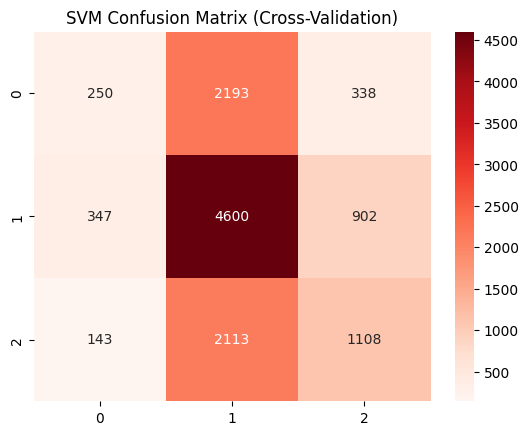

SVM Accuracy (Test Set): 0.4832
SVM Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.31      0.10      0.15       719
           1       0.51      0.77      0.61      1447
           2       0.46      0.32      0.38       833

    accuracy                           0.48      2999
   macro avg       0.43      0.40      0.38      2999
weighted avg       0.45      0.48      0.44      2999



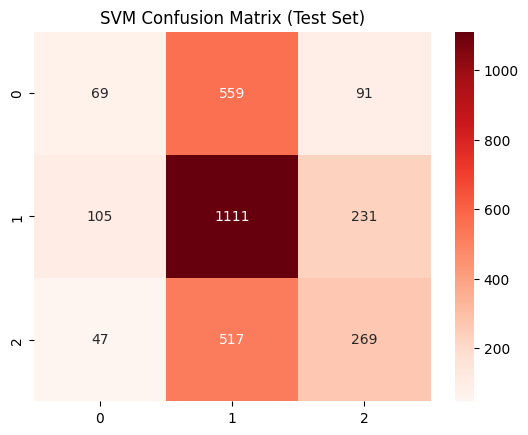

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced'],
}

svm = LinearSVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_multiclass, y_train_multiclass)

best_svm = grid_search_svm.best_estimator_
print("Best Parameters for SVM:", grid_search_svm.best_params_)

y_pred_cv_svm = cross_val_predict(best_svm, X_train_multiclass, y_train_multiclass, cv=3, n_jobs=-1)

cv_accuracy_svm = accuracy_score(y_train_multiclass, y_pred_cv_svm)
print(f"SVM Accuracy (Cross-Validation): {cv_accuracy_svm:.4f}")

print("SVM Classification Report (Cross-Validation):")
print(classification_report(y_train_multiclass, y_pred_cv_svm))

cv_conf_matrix_svm = confusion_matrix(y_train_multiclass, y_pred_cv_svm)
sns.heatmap(cv_conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix (Cross-Validation)')
plt.show()

y_pred_best_svm = best_svm.predict(X_test_multiclass)

test_accuracy_svm = accuracy_score(y_test_multiclass, y_pred_best_svm)
print(f"SVM Accuracy (Test Set): {test_accuracy_svm:.4f}")

print("SVM Classification Report (Test Set):")
print(classification_report(y_test_multiclass, y_pred_best_svm))

test_conf_matrix_svm = confusion_matrix(y_test_multiclass, y_pred_best_svm)
sns.heatmap(test_conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix (Test Set)')
plt.show()

6. Compare Results

The performance of the classifiers, as measured by accuracy and macro F1-score, highlights the challenges of this task. Here’s a breakdown:

In [ ]:
results = {
    "Classifier": ["KNN", "Naive Bayes", "Logistic Regression", "Decision Tree", "SVM"],
    "CV Accuracy": [0.51, 0.46, 0.49, 0.52, 0.50],
    "Test Accuracy": [0.51, 0.48, 0.48, 0.52, 0.48],
    "Macro F1 (CV)": [0.45, 0.42, 0.27, 0.37, 0.38],
    "Macro F1 (Test)": [0.46, 0.42, 0.26, 0.38, 0.38],
}

results_df = pd.DataFrame(results)

print(results_df)

            Classifier  CV Accuracy  Test Accuracy  Macro F1 (CV)  \
0                  KNN         0.51           0.51           0.45   
1          Naive Bayes         0.46           0.48           0.42   
2  Logistic Regression         0.49           0.48           0.27   
3        Decision Tree         0.52           0.52           0.37   
4                  SVM         0.50           0.48           0.38   

   Macro F1 (Test)  
0             0.46  
1             0.42  
2             0.26  
3             0.38  
4             0.38  


**Key Observations**:
1. Best Classifier Overall (Decision Tree):

- The Decision Tree achieved the highest accuracy (0.52 for both cross-validation and test sets), narrowly outperforming KNN (0.51).
- Its macro F1-scores (0.37 CV, 0.38 Test) suggest that it balanced performance across all classes better than some others.

2. KNN’s Performance:

- While KNN matched Decision Tree’s accuracy closely, its macro F1-scores were significantly better (0.45 CV, 0.46 Test). This indicates it handled class imbalances more effectively and performed more robustly across all classes.

3. Naive Bayes and Logistic Regression:

- Both struggled with this task, with Naive Bayes posting consistently low accuracy (0.46 for both CV and Test) and macro F1-scores.
- Logistic Regression, despite reasonable accuracy (0.49 CV, 0.48 Test), suffered from very low macro F1-scores (0.27 CV, 0.26 Test), indicating poor performance on minority classes.

4. SVM’s Mixed Results:

- The SVM delivered competitive accuracy (0.50 CV, 0.48 Test) but had underwhelming macro F1-scores (0.38 CV, 0.38 Test). This suggests that while it correctly predicted many majority-class samples, its ability to generalize to minority classes was limited.

**Best Classifier for This Task**:
- Based on accuracy, the Decision Tree is the top-performing classifier for this dataset. It balances simplicity and interpretability, while its results are slightly better than the others.
- Based on macro F1-score, KNN is arguably the best choice because it ensures more equitable performance across all classes, which is critical in imbalanced datasets.

### 1.1.3. Train specialized models for cats and dogs

For this task, we will focus exclusively on the Decision Tree and SVM classifiers, as these were the best-performing models in the previous tasks of the project. The goal is to train specialized models for cats and dogs to determine whether this approach improves classification performance when predicting Adoption (binary classification) and AdoptionSpeed (multiclass classification).

#### **Cats only**

0. **Preprocessing**

In [ ]:
cats_data = data[data['Type'] == 2]

In [ ]:
# Binary Classification (Adoption target variable)
binary_cats = cats_data.copy()
binary_cats['Adoption'] = data['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)
cats_binary_features = binary_cats.drop(columns=['AdoptionSpeed','Adoption','Type'])
cats_binary_target = binary_cats['Adoption']

In [ ]:
X_train_binary_cats, X_test_binary_cats, y_train_binary_cats, y_test_binary_cats = train_test_split(
    cats_binary_features, cats_binary_target, test_size=0.3, random_state=42, stratify=cats_binary_target
)

In [ ]:
# Multiclass Classification (AdoptionSpeed target variable)
multiclass_cats = cats_data.copy()
multiclass_cats['AdoptionSpeed_3classes'] = multiclass_cats['AdoptionSpeed'].apply(
    lambda x: 0 if x in [0, 1] else (1 if x in [2, 3] else 2)
)
cats_multiclass_features = multiclass_cats.drop(['Adoption', 'AdoptionSpeed_3classes', 'Type', 'AdoptionSpeed'], axis=1)
cats_multiclass_target = multiclass_cats['AdoptionSpeed_3classes']

In [ ]:
X_train_multiclass_cats, X_test_multiclass_cats, y_train_multiclass_cats, y_test_multiclass_cats = train_test_split(
    cats_multiclass_features, cats_multiclass_target, test_size=0.2, random_state=42, stratify=cats_multiclass_target
)

1. **Decision Tree (Binary)**

Decision Tree Accuracy (with Weights): 0.6764
Decision Tree Classification Report (with Class Weights):
              precision    recall  f1-score   support

           0       0.38      0.39      0.39       535
           1       0.78      0.78      0.78      1524

    accuracy                           0.68      2059
   macro avg       0.58      0.58      0.58      2059
weighted avg       0.68      0.68      0.68      2059



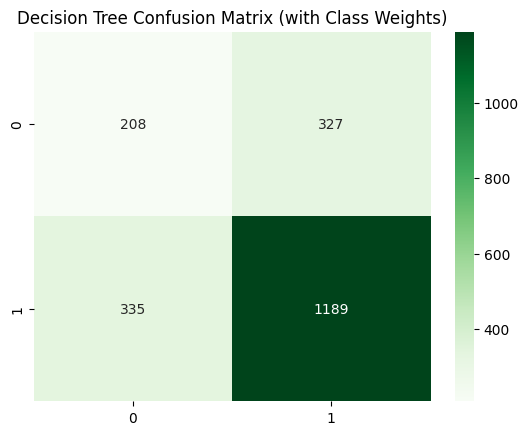

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_scores = cross_val_score(dt, X_train_binary_cats, y_train_binary_cats, cv=5, scoring='accuracy')
print(f"Decision Tree Accuracy (with Weights): {dt_scores.mean():.4f}")

dt.fit(X_train_binary_cats, y_train_binary_cats)
y_pred_dt = dt.predict(X_test_binary_cats)

print("Decision Tree Classification Report (with Class Weights):")
print(classification_report(y_test_binary_cats, y_pred_dt))

sns.heatmap(confusion_matrix(y_test_binary_cats, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix (with Class Weights)')
plt.show()

1.1. **Decision Tree (Multiclassification)**

Decision Tree Accuracy (Test Set): 0.4210
Decision Tree Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       379
           1       0.50      0.49      0.49       637
           2       0.39      0.41      0.40       357

    accuracy                           0.42      1373
   macro avg       0.40      0.41      0.40      1373
weighted avg       0.42      0.42      0.42      1373



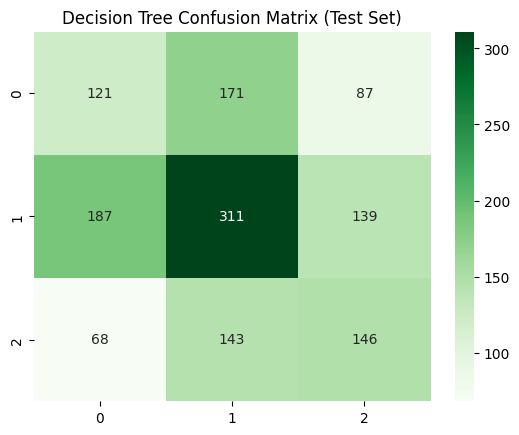

In [ ]:
decision_tree_multiclass = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_multiclass.fit(X_train_multiclass_cats, y_train_multiclass_cats)

y_pred_test_multiclass = decision_tree_multiclass.predict(X_test_multiclass_cats)

test_accuracy_multiclass = accuracy_score(y_test_multiclass_cats, y_pred_test_multiclass)
print(f"Decision Tree Accuracy (Test Set): {test_accuracy_multiclass:.4f}")

print("Decision Tree Classification Report (Test Set):")
print(classification_report(y_test_multiclass_cats, y_pred_test_multiclass))

test_conf_matrix_multiclass = confusion_matrix(y_test_multiclass_cats, y_pred_test_multiclass)
sns.heatmap(test_conf_matrix_multiclass, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.show()

2. **SVM (Binary)**

SVM Cross-Validation Accuracy: 0.6252
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.59      0.44       535
           1       0.81      0.61      0.70      1524

    accuracy                           0.61      2059
   macro avg       0.58      0.60      0.57      2059
weighted avg       0.69      0.61      0.63      2059



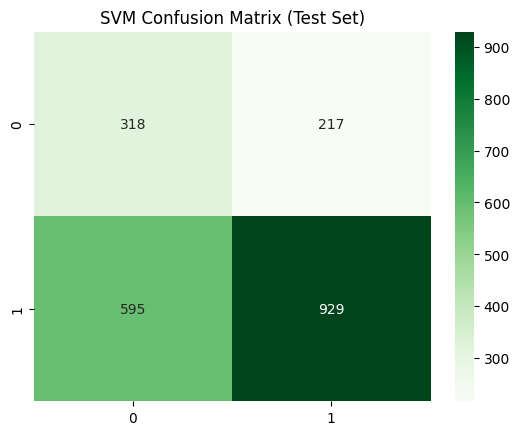

In [ ]:
svm = LinearSVC(random_state=42, max_iter=5000, class_weight="balanced")

with parallel_backend('loky'):
    svm_scores = cross_val_score(svm, X_train_binary_cats, y_train_binary_cats, cv=3, scoring='accuracy', n_jobs=-1)

print(f"SVM Cross-Validation Accuracy: {svm_scores.mean():.4f}")

svm.fit(X_train_binary_cats, y_train_binary_cats)

y_pred_svm = svm.predict(X_test_binary_cats)

print("SVM Classification Report:")
print(classification_report(y_test_binary_cats, y_pred_svm))

sns.heatmap(confusion_matrix(y_test_binary_cats, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix (Test Set)')
plt.show()

2.1. **SVM (Multiclassification)**

SVM Cross-Validation Accuracy (Multiclass): 0.4657
SVM Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.30      0.03      0.06       379
           1       0.47      0.86      0.61       637
           2       0.45      0.22      0.30       357

    accuracy                           0.46      1373
   macro avg       0.41      0.37      0.32      1373
weighted avg       0.42      0.46      0.38      1373



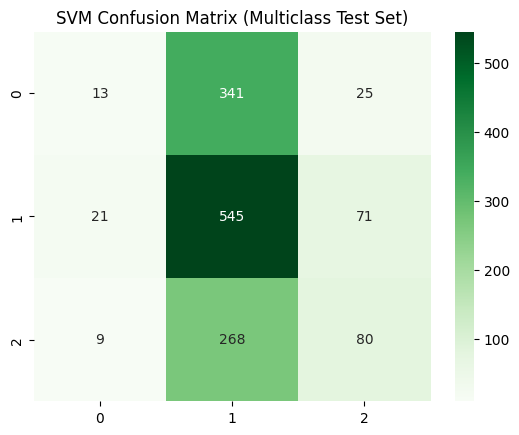

In [ ]:
svm = LinearSVC(random_state=42, max_iter=5000, class_weight="balanced")

with parallel_backend('loky'):
    svm_scores = cross_val_score(svm, X_train_multiclass_cats, y_train_multiclass_cats, cv=3, scoring='accuracy', n_jobs=-1)

print(f"SVM Cross-Validation Accuracy (Multiclass): {svm_scores.mean():.4f}")

svm.fit(X_train_multiclass_cats, y_train_multiclass_cats)

y_pred_svm = svm.predict(X_test_multiclass_cats)

print("SVM Classification Report (Multiclass):")
print(classification_report(y_test_multiclass_cats, y_pred_svm))

sns.heatmap(confusion_matrix(y_test_multiclass_cats, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix (Multiclass Test Set)')
plt.show()

#### **Dogs Only**

In [ ]:
dogs_data = data[data['Type'] == 1]

In [ ]:
# Binary Classification (Adoption target variable)
binary_dogs = dogs_data.copy()
binary_dogs['Adoption'] = data['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)
dogs_binary_features = binary_dogs.drop(columns=['AdoptionSpeed','Adoption','Type'])
dogs_binary_target = binary_dogs['Adoption']

In [ ]:
X_train_binary_dogs, X_test_binary_dogs, y_train_binary_dogs, y_test_binary_dogs = train_test_split(
    dogs_binary_features, dogs_binary_target, test_size=0.3, random_state=42, stratify=dogs_binary_target
)

In [ ]:
# Multiclass Classification (AdoptionSpeed target variable)
multiclass_dogs = dogs_data.copy()
multiclass_dogs['AdoptionSpeed_3classes'] = multiclass_dogs['AdoptionSpeed'].apply(
    lambda x: 0 if x in [0, 1] else (1 if x in [2, 3] else 2)
)
dogs_multiclass_features = multiclass_dogs.drop(['Adoption', 'AdoptionSpeed_3classes', 'Type', 'AdoptionSpeed'], axis=1)
dogs_multiclass_target = multiclass_dogs['AdoptionSpeed_3classes']

In [ ]:
X_train_multiclass_dogs, X_test_multiclass_dogs, y_train_multiclass_dogs, y_test_multiclass_dogs = train_test_split(
    dogs_multiclass_features, dogs_multiclass_target, test_size=0.2, random_state=42, stratify=dogs_multiclass_target
)

1. **Decision Tree (Binary)**

Decision Tree Accuracy (with Weights): 0.4947
Decision Tree Classification Report (with Class Weights):
              precision    recall  f1-score   support

           0       0.30      0.34      0.32       321
           1       0.58      0.55      0.57       823
           2       0.46      0.46      0.46       483

    accuracy                           0.48      1627
   macro avg       0.45      0.45      0.45      1627
weighted avg       0.49      0.48      0.49      1627



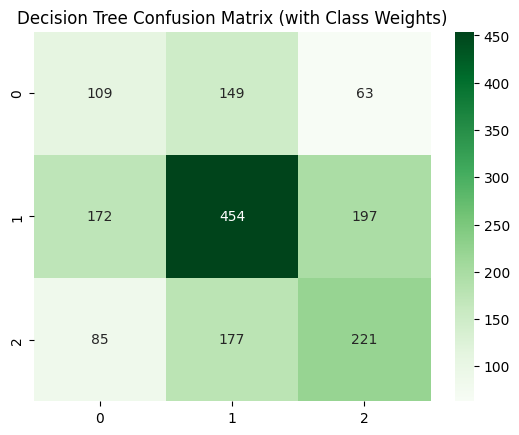

In [ ]:
dt_dogs = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_scores = cross_val_score(dt_dogs, X_train_multiclass_dogs, y_train_multiclass_dogs, cv=5, scoring='accuracy')
print(f"Decision Tree Accuracy (with Weights): {dt_scores.mean():.4f}")

dt_dogs.fit(X_train_multiclass_dogs, y_train_multiclass_dogs)
y_pred_dt = dt_dogs.predict(X_test_multiclass_dogs)

print("Decision Tree Classification Report (with Class Weights):")
print(classification_report(y_test_multiclass_dogs, y_pred_dt))

sns.heatmap(confusion_matrix(y_test_multiclass_dogs, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix (with Class Weights)')
plt.show()

1.1. **Decision Tree (Multiclassification)**

Decision Tree Accuracy (Test Set): 0.4819
Decision Tree Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.30      0.34      0.32       321
           1       0.58      0.55      0.57       823
           2       0.46      0.46      0.46       483

    accuracy                           0.48      1627
   macro avg       0.45      0.45      0.45      1627
weighted avg       0.49      0.48      0.49      1627



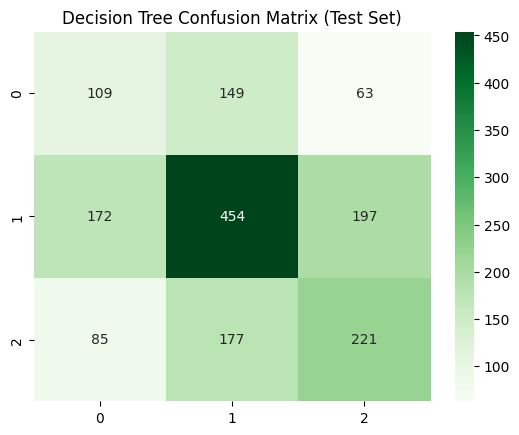

In [ ]:
decision_tree_multiclass = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_multiclass.fit(X_train_multiclass_dogs, y_train_multiclass_dogs)

y_pred_test_multiclass = decision_tree_multiclass.predict(X_test_multiclass_dogs)

test_accuracy_multiclass = accuracy_score(y_test_multiclass_dogs, y_pred_test_multiclass)
print(f"Decision Tree Accuracy (Test Set): {test_accuracy_multiclass:.4f}")

print("Decision Tree Classification Report (Test Set):")
print(classification_report(y_test_multiclass_dogs, y_pred_test_multiclass))

test_conf_matrix_multiclass = confusion_matrix(y_test_multiclass_dogs, y_pred_test_multiclass)
sns.heatmap(test_conf_matrix_multiclass, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.show()

2. **SVM (Binary)**

SVM Cross-Validation Accuracy: 0.6268
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.66      0.50       724
           1       0.80      0.60      0.69      1716

    accuracy                           0.61      2440
   macro avg       0.61      0.63      0.59      2440
weighted avg       0.69      0.61      0.63      2440



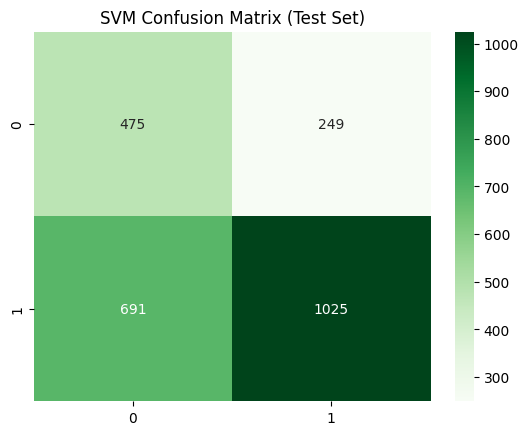

In [ ]:
svm = LinearSVC(random_state=42, max_iter=5000, class_weight="balanced")

with parallel_backend('loky'):
    svm_scores = cross_val_score(svm, X_train_binary_dogs, y_train_binary_dogs, cv=3, scoring='accuracy', n_jobs=-1)

print(f"SVM Cross-Validation Accuracy: {svm_scores.mean():.4f}")

svm.fit(X_train_binary_dogs, y_train_binary_dogs)

y_pred_svm = svm.predict(X_test_binary_dogs)

print("SVM Classification Report:")
print(classification_report(y_test_binary_dogs, y_pred_svm))

sns.heatmap(confusion_matrix(y_test_binary_dogs, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix (Test Set)')
plt.show()

2.1. **SVM (Multiclassification)**

SVM Cross-Validation Accuracy (Multiclass): 0.4657
SVM Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.30      0.03      0.06       379
           1       0.47      0.86      0.61       637
           2       0.45      0.22      0.30       357

    accuracy                           0.46      1373
   macro avg       0.41      0.37      0.32      1373
weighted avg       0.42      0.46      0.38      1373



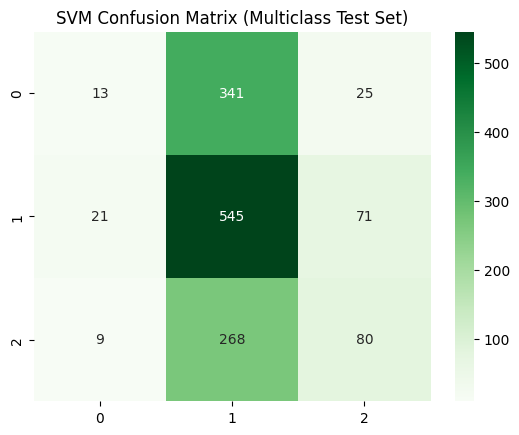

In [ ]:
svm = LinearSVC(random_state=42, max_iter=5000, class_weight="balanced")

with parallel_backend('loky'):
    svm_scores = cross_val_score(svm, X_train_multiclass_cats, y_train_multiclass_cats, cv=3, scoring='accuracy', n_jobs=-1)

print(f"SVM Cross-Validation Accuracy (Multiclass): {svm_scores.mean():.4f}")

svm.fit(X_train_multiclass_cats, y_train_multiclass_cats)

y_pred_svm = svm.predict(X_test_multiclass_cats)

print("SVM Classification Report (Multiclass):")
print(classification_report(y_test_multiclass_cats, y_pred_svm))

sns.heatmap(confusion_matrix(y_test_multiclass_cats, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix (Multiclass Test Set)')
plt.show()

#### **Discussion of Results**

1. Binary Classification (Adoption):

- Cats: The Decision Tree performed best, with 67.64% accuracy and a balanced F1-score of 0.68. SVM was slightly lower at 62.52% but achieved better recall for non-adopted cases.
- Dogs: SVM outperformed the Decision Tree (62.68% vs. 49.47%), showing better precision and recall, though both models struggled with balance across classes.

2. Multiclass Classification (AdoptionSpeed):

- Cats: SVM slightly edged out the Decision Tree (46.57% vs. 42.10% accuracy) and excelled in predicting intermediate adoption speeds but struggled with slower adoption classes.
- Dogs: Both models had similar performance, with the Decision Tree at 48.19% and SVM at 46.57%. Neither effectively captured nuances of slower adoption speeds.

3. Key Insights:

- Binary classification yielded better results overall, with cats being more predictable than dogs.
- Decision Tree was the best for binary classification in cats, while SVM performed better for dogs and multiclass tasks.

**Most influential features**

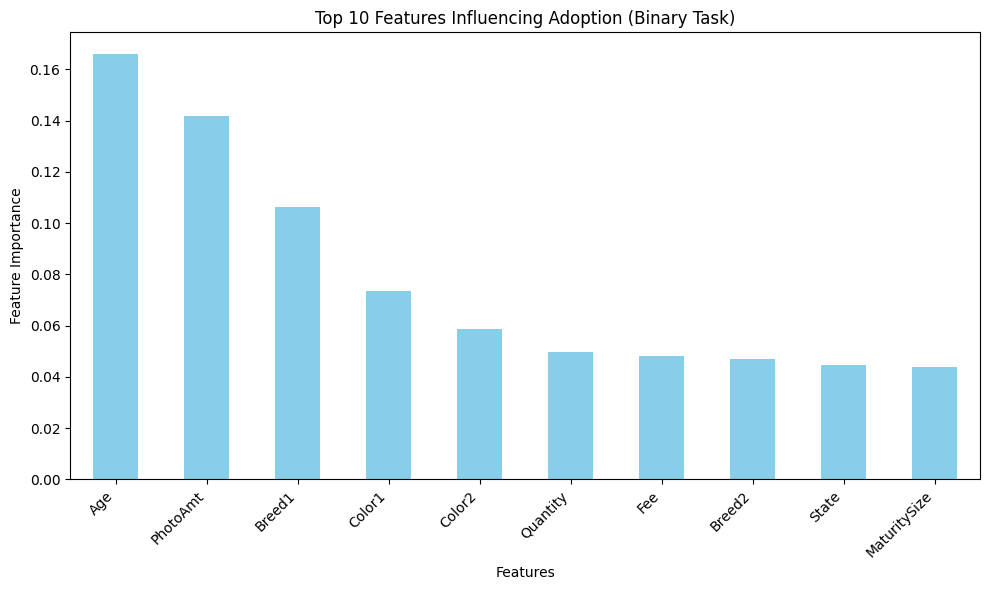

In [ ]:
# Binary Classification Feature Importance
binary_feature_importance = pd.Series(
    dt.feature_importances_,
    index=X_train_binary_cats.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
binary_feature_importance.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Features Influencing Adoption (Binary Task)')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

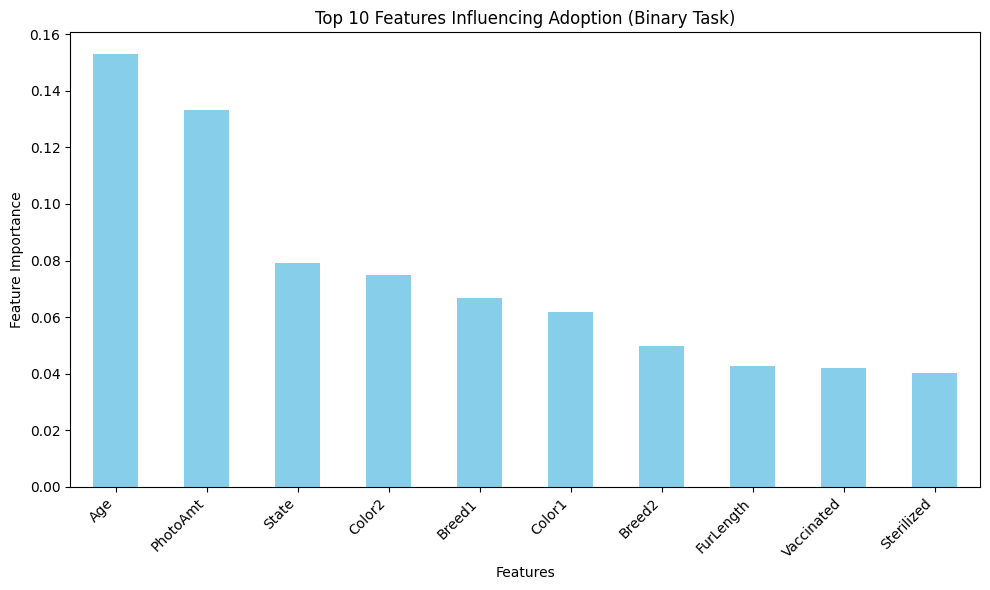

In [ ]:
# Binary Classification Feature Importance
binary_feature_importance = pd.Series(
    dt_dogs.feature_importances_,
    index=X_train_binary_dogs.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
binary_feature_importance.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Features Influencing Adoption (Binary Task)')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As can be seen by the bar plots above, the most important features, for cats and dogs allike are identical, with the most important of them being the animals age and the mapount of photos of the animal.

## 1.2. Classification - Final Discussion and Conclusions

The results of the study of many classifiers and specialized techniques showed how crucial feature engineering and model selection are to producing significant predictions. A thorough investigation of binary and multiclass classification techniques brought to light the unique difficulties that each task type presents. Achieving high precision and recall for adoption prediction was a key goal for binary classification, making sure the model identified significant patterns in the data. However, in order to accurately anticipate adoption pace, it was necessary to balance accuracy across several classes while addressing class imbalances, which added complexity to the multiclass classification assignment.

A useful strategy that demonstrated how the distinctive characteristics of cats and dogs affected adoption trends was the use of specialized models for these animals. By concentrating on characteristics unique to each species, these customized models provided better performance.

The knowledge gathered from both general-purpose and specialist models showed patterns in the data that might be used to improve adoption tactics or allocate resources for shelters, among other decision-making processes. Additionally, the methodical assessment of models brought to light the need for practical machine learning applications to strike a balance between interpretability, accuracy, and computing economy.

## Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed

In this task you should **use unsupervised learning to characterize pets and their adoption speed**. You have 2 clustering:
1. **Use Clustering algorithms to find similar groups of adopted pets.** When animals are adopted, is it possible to find groups of pets with the same/similar adoption speed? Evaluate clustering results using **internal and external metrics**.
2. **Be creative and define and explore your own unsupervised learning task!** What else would it be interesting to find out?

#### In this task, unsupervised learning techniques are applied to uncover patterns in pet characteristics and their adoption speeds. Unlike supervised learning, where the focus is on predicting a target variable, the goal here is to group pets into clusters based on shared attributes. By examining these clusters, we aim to identify groups of pets with similar adoption behavior and explore factors that influence adoption speeds. Additionally, we creatively investigate other patterns that could provide insights into the adoption process, such as how pet listing attributes like age, fees, and photos may shape adoption outcomes.

#### This exploration is vital for understanding adoption trends, as it can inform shelter policies, improve marketing strategies, and identify groups of pets that may require additional support for faster adoption. Two clustering approaches, K-Means and Hierarchical Clustering, are employed to achieve these goals, followed by a thorough evaluation of the clustering results.

## 2.1. Preprocessing Data for Clustering

### 2.1.1. Selecting relevant features for clustering

The features chosen for this analysis were Age, Fee, Quantity, and PhotoAmt. These features are directly related to the characteristics of pets and their presentation in adoption listings. Here’s why each feature was selected:

- Age: A key factor influencing adoption speed; younger pets may have higher adoption rates.
- Fee: Reflects the cost associated with adopting a pet, which could impact potential adopters' decisions.
- Quantity: The number of pets in a single listing, which might indicate group adoptions or litters.
- PhotoAmt: The number of photos can be a proxy for the attractiveness of a listing, influencing its visibility.

Before clustering, the data was cleaned to handle missing values. Missing values in numeric columns were filled with zeroes to ensure completeness without introducing bias. The features were then standardized using StandardScaler to normalize their ranges. Standardization was necessary because the features have different scales, and clustering algorithms are sensitive to scale differences. For example, without scaling, Fee (which can range in hundreds) might dominate PhotoAmt (typically a single-digit number).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

features = ['Age', 'Fee', 'Quantity', 'PhotoAmt']

clustering_data = data[features].fillna(0)
clustering_data.head()


,Age,Fee,Quantity,PhotoAmt
0,3,100,1,1.0
1,1,0,1,2.0
2,1,0,1,7.0
3,4,150,1,8.0
4,1,0,1,3.0


### 2.1.2. Stardardizing the data

In [ ]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

clustering_data_scaled = pd.DataFrame(clustering_data_scaled, columns=features)
clustering_data_scaled.head()

,Age,Fee,Quantity,PhotoAmt
0,-0.410466,1.004184,-0.391237,-0.828403
1,-0.520627,-0.271132,-0.391237,-0.541680
2,-0.520627,-0.271132,-0.391237,0.891932
3,-0.355385,1.641842,-0.391237,1.178654
4,-0.520627,-0.271132,-0.391237,-0.254958


## 2.2. Learning and Evaluating Clusterings

### 2.2.1. K-Means Clustering

#### Determining the optimal number of clusters using the Elbow Method (Within-Cluster Sum of Square)

#### **Choosing the Optimal Number of Clusters**

#### To determine the appropriate number of clusters for K-Means, the Elbow Method was used. This method evaluates the total within-cluster variance (WCSS) for different numbers of clusters. As the number of clusters increases, WCSS decreases because the data points are divided into smaller groups. The "elbow" point, where WCSS reduction slows, represents the optimal number of clusters. For this dataset, the elbow was identified at 5 clusters, balancing cluster compactness with interpretability.

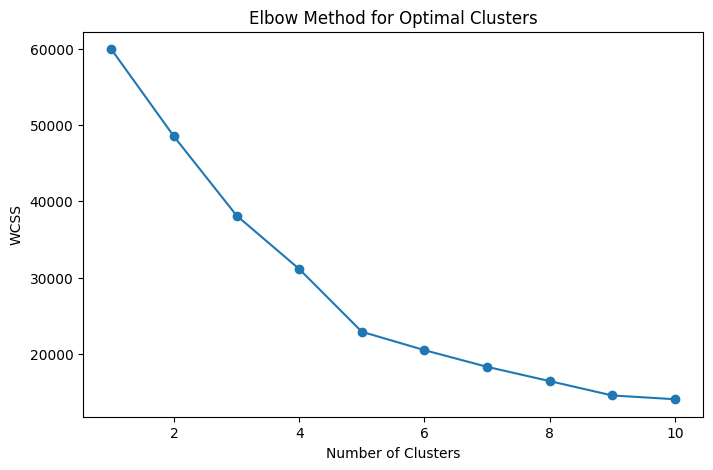

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means Clustering and visualization using the first two Principal Components

#### **Applying K-Means**

#### Once the optimal number of clusters was established, K-Means was applied. This algorithm groups data points by minimizing intra-cluster variance while maximizing inter-cluster separation. Each cluster represents a distinct grouping of pets based on their characteristics.

In [ ]:
# Perform K-Means clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=31)
clustering_data['K_Cluster'] = kmeans.fit_predict(clustering_data_scaled)

clustering_data.head()

,Age,Fee,Quantity,PhotoAmt,K_Cluster
0,3,100,1,1.0,1
1,1,0,1,2.0,1
2,1,0,1,7.0,1
3,4,150,1,8.0,1
4,1,0,1,3.0,1


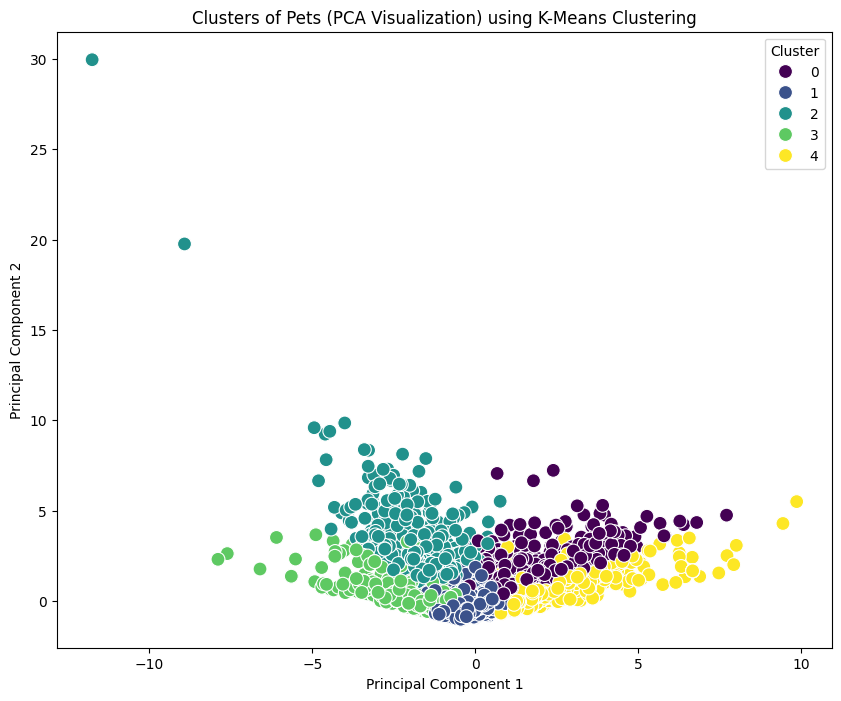

In [ ]:
# Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

pca_df = pd.DataFrame(clustering_data_pca, columns=['PC1', 'PC2'])
pca_df['K_Cluster'] = clustering_data['K_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='K_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters of Pets (PCA Visualization) using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Evaluation of K-Means Clustering

1. **Summary of average values in each cluster**

In [ ]:
cluster_summary = clustering_data.groupby('K_Cluster').mean()

cluster_summary

,Age,Fee,Quantity,PhotoAmt
K_Cluster,,,,
0,5.479208,12.004950,1.696040,13.314851
1,5.742891,7.930004,1.210445,3.097065
2,17.923077,324.135843,1.144026,3.530278
3,59.658697,13.183842,1.103875,2.929101
4,4.082561,4.700084,5.558551,4.357203


2. **Evaluation using Silhouette Score**

In [ ]:
silhouette_avg_kmeans = silhouette_score(clustering_data_scaled, clustering_data['K_Cluster'])

print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans:.2f}")

Silhouette Score for K-Means: 0.55


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

k = 5
kms = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(clustering_data_scaled)
hca = AgglomerativeClustering(linkage="ward", n_clusters=k).fit(clustering_data_scaled)

In [ ]:
from sklearn import metrics
import matplotlib.cm as cm

def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = metrics.silhouette_score(X, labels)
    for i,c in enumerate(clusters):
        silhouette_values = metrics.silhouette_samples(X, labels)
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = cm.nipy_spectral(i / n_clusters) #np.array(["r", "g", "b", "k", "y"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([])
    plt.show()

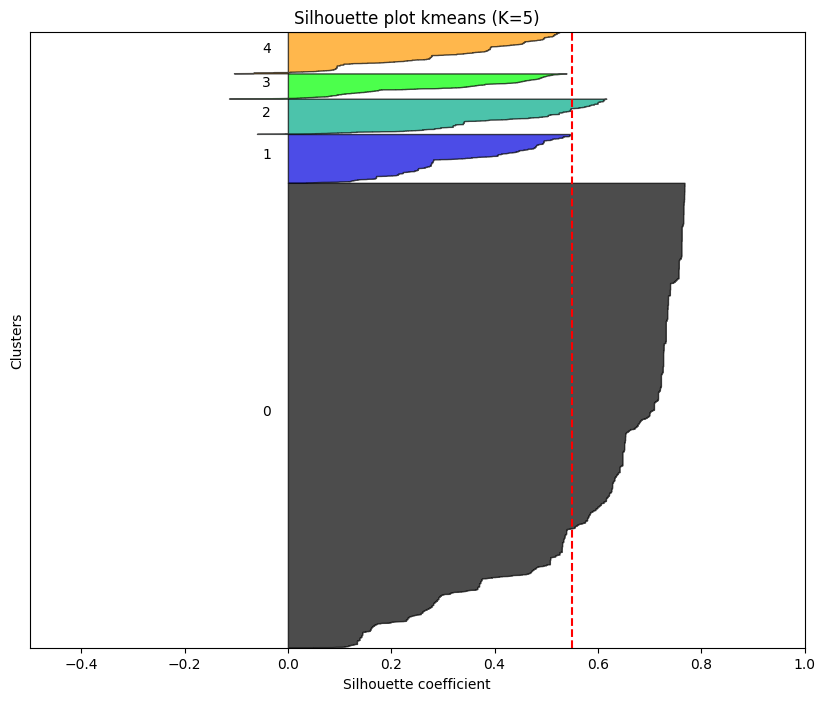

In [ ]:
drawSillouette(clustering_data_scaled, kms.labels_, "kmeans (K=5)")

3. **The Calinsky-Harabasz metric**

In [ ]:
print("Kmeans Calinski Harabasz score", metrics.calinski_harabasz_score(clustering_data_scaled, kms.labels_))


Kmeans Calinski Harabasz score 6031.163838444154


4. **The Davies-Bouldin metric**

In [ ]:
print("Kmeans Davies-Bouldin score", metrics.davies_bouldin_score(clustering_data_scaled, kms.labels_))

Kmeans Davies-Bouldin score 0.7478725597814101


### 2.2.2. Hierarchical Clustering

#### Hierarchical clustering provides a hierarchical representation of the data, allowing us to explore nested relationships between clusters. The Ward linkage method was used, as it minimizes the variance within clusters during the merging process, ensuring compact and meaningful groupings.

#### Dendrogram for Hierarchical Clustering

#### **Visualizing the Dendrogram**

#### A dendrogram was generated to visualize the hierarchical clustering process. This plot helps identify the appropriate number of clusters by observing where large vertical distances occur between merges. Based on the dendrogram, 5 clusters were chosen to align with the K-Means results, facilitating a comparison between the methods.

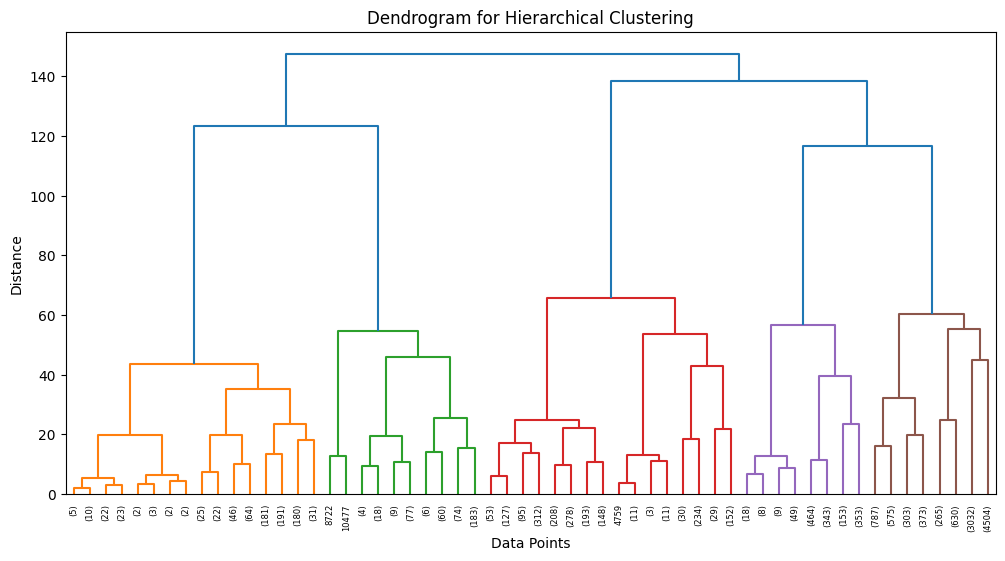

In [ ]:
linkage_matrix = linkage(clustering_data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

#### Hierarchical Clustering and visualization using the first two Principal Components

#### **Agglomerative Clustering**

#### Agglomerative clustering, a bottom-up approach, was applied to assign pets to hierarchical clusters. Like K-Means, the Silhouette Score was calculated to assess cluster quality. The score for hierarchical clustering was slightly lower than K-Means, around 0.49, reflecting slightly less well-defined boundaries.

In [ ]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
clustering_data['Agg_Cluster'] = agg_clustering.fit_predict(clustering_data_scaled)

# Mapping the clusters according to the K-Means clusters
agg_cluster_mapping = {1: 0, 2: 1, 4: 2, 3: 3, 0: 4}
clustering_data['Agg_Cluster'] = clustering_data['Agg_Cluster'] .map(agg_cluster_mapping)

clustering_data.head()

,Age,Fee,Quantity,PhotoAmt,K_Cluster,Agg_Cluster
0,3,100,1,1.0,1,1
1,1,0,1,2.0,1,1
2,1,0,1,7.0,1,0
3,4,150,1,8.0,1,2
4,1,0,1,3.0,1,1


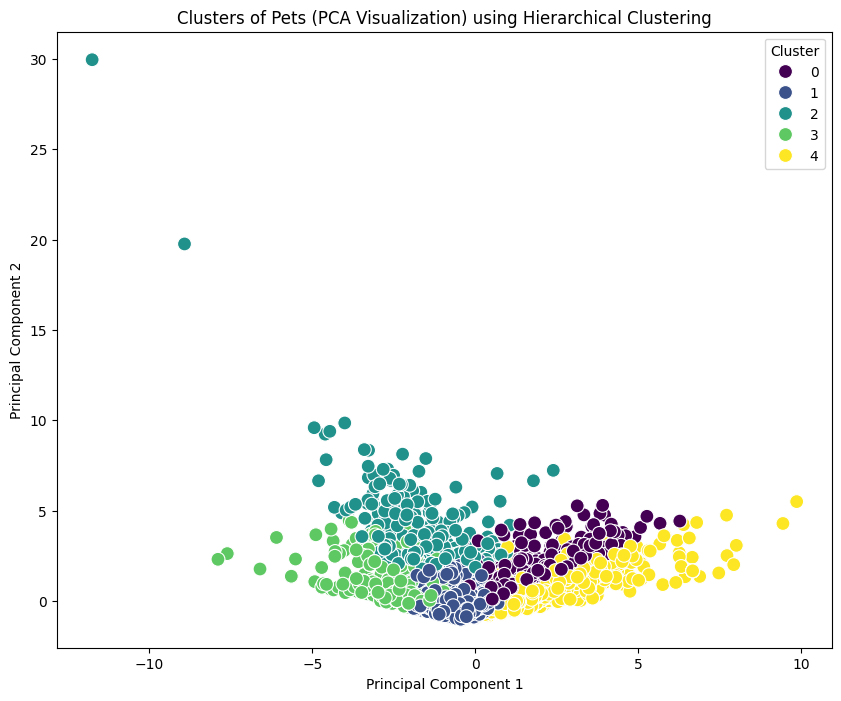

In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

pca_df = pd.DataFrame(clustering_data_pca, columns=['PC1', 'PC2'])
pca_df['Agg_Cluster'] = clustering_data['Agg_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters of Pets (PCA Visualization) using Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Evaluation of Hierarchical Clustering

1. **Summary of average values in each cluster**

In [ ]:
cluster_summary = clustering_data.drop('K_Cluster', axis=1).groupby('Agg_Cluster').mean()

cluster_summary

,Age,Fee,Quantity,PhotoAmt
Agg_Cluster,,,,
0,5.464567,6.920544,1.260558,11.004295
1,7.438437,10.825007,1.113382,2.834941
2,16.013857,367.780600,1.150115,4.457275
3,70.613103,37.446230,1.114957,3.128554
4,3.788329,3.296021,4.675332,4.667374


2. **Evaluation using Silhouette Score**

In [ ]:
silhouette_avg_agg = silhouette_score(clustering_data_scaled, clustering_data['Agg_Cluster'])

print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_agg:.2f}")

Silhouette Score for Hierarchical Clustering: 0.47


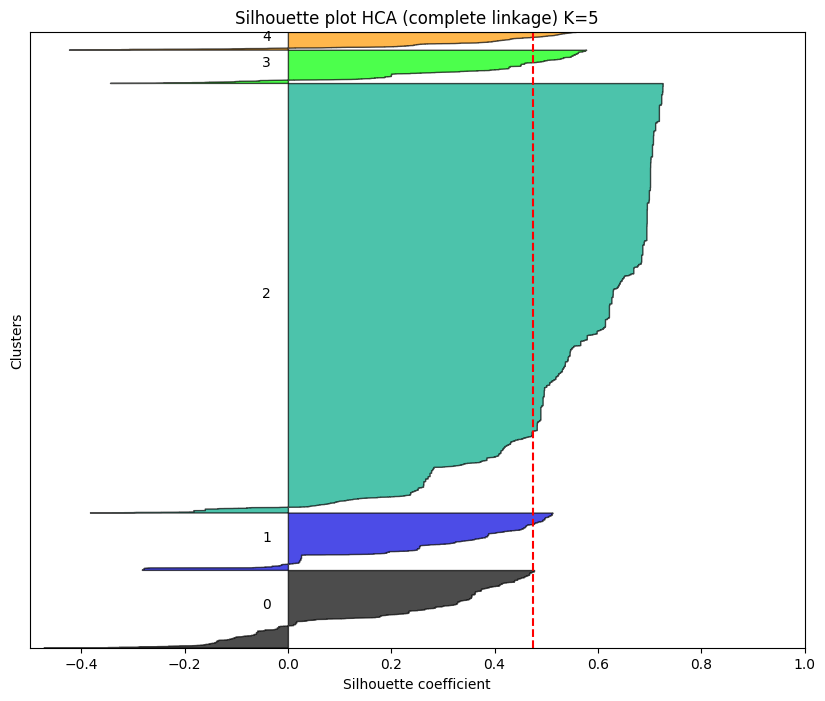

In [ ]:
drawSillouette(clustering_data_scaled, hca.labels_, "HCA (complete linkage) K=5")

3. **The Calinsky-Harabasz metric**

In [ ]:
print("HCA Calinski Harabasz score", metrics.calinski_harabasz_score(clustering_data_scaled, hca.labels_))

HCA Calinski Harabasz score 5206.165367412992


4. **The Davies-Bouldin metric**

In [ ]:
print("HCA Davies-Bouldin score", metrics.davies_bouldin_score(clustering_data_scaled, hca.labels_))

HCA Davies-Bouldin score 0.8293354190277082


#### Cluster Evaluation Metrics Analysis - Internal Metrics


- To evaluate the performance of the K-means and Hierarchical Clustering Algorithm (HCA), three intrinsic metrics: Silhouette Score, Calinski-Harabasz metric and Davies-Bouldin metric were calculated. These metrics assess clustering quality without relying on ground truth labels, focusing on intra-cluster cohesion and inter-cluster separation. The results are summarized as follows:

1. **Silhouette Score**
<br>K-means: 0.55 <br> HCA: 0.47
<br>The Silhouette Score ranges from -1 to +1, where higher values indicate better-defined clusters. K-means achieved a higher score, indicating that its clusters are more compact and well-separated compared to those of HCA. The lower score for HCA suggests overlapping clusters or less-defined cluster boundaries.

2. **Calinski-Harabasz Metrics**
<br>K-means: 6031.16 <br> HCA: 5206.17
<br>The Calinski-Harabasz metrics measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion, with higher values signifying better clustering. K-means outperformed HCA, indicating it produced clusters that are more distinct from one another while maintaining high internal consistency.


3. **Davies-Bouldin Metrics**
<br> K-means: 0.7478 <br> HCA: 0.8293
<br> The Davies-Bouldin metrics evaluates the average similarity between clusters, with lower scores representing better-defined clusters. K-means achieved a lower score, suggesting that the clusters are more distinct and exhibit less overlap compared to HCA.

- Conclusion:
<br> The results of all three metrics consistently indicate that K-means is the superior clustering algorithm for this dataset. It produces clusters that are more compact, well-separated, and distinct compared to HCA. While HCA may still be useful for specific applications, such as hierarchical relationships or visualization purposes, K-means is recommended for this task due to its overall better performance in intrinsic evaluation.


#### Cluster Evaluation Metrics Analysis - External Metrics using Ground Truth

In [ ]:
y = data.AdoptionSpeed

In [ ]:
print('y Labels:', set(y))
print('N. 0 cases:', list(y).count(0))
print('N. 1 cases:', list(y).count(1))
print('N. 2 cases:', list(y).count(2))
print('N. 3 cases:', list(y).count(3))
print('N. 4 cases:', list(y).count(4))

y Labels: {0, 1, 2, 3, 4}
N. 0 cases: 410
N. 1 cases: 3090
N. 2 cases: 4037
N. 3 cases: 3259
N. 4 cases: 4197


Homogeneity Score

In [ ]:
print("Kmeans Homogeneity score", metrics.homogeneity_score(y, kms.labels_))
print("HCA Homogeneity score", metrics.homogeneity_score(y, hca.labels_))

Kmeans Homogeneity score 0.0055672277357129
HCA Homogeneity score 0.00610339272065682


Completeness Score

In [ ]:
print("Kmeans Completeness score", metrics.completeness_score(y, kms.labels_))
print("HCA Completeness score", metrics.completeness_score(y, hca.labels_))

Kmeans Completeness score 0.009178087583337909
HCA Completeness score 0.009011012875024258


V-Measure Score

In [ ]:
print("Kmeans V-measure score", metrics.v_measure_score(y, kms.labels_))
print("HCA V-measure score", metrics.v_measure_score(y, hca.labels_))

Kmeans V-measure score 0.006930540669923115
HCA V-measure score 0.00727752739451209


Contigency Matrix

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(kms.labels_,y)

array([[ 336, 2464, 3066, 2356, 3103],
       [  22,  186,  298,  234,  447],
       [  21,  149,  201,  184,  303],
       [  17,  130,  170,  126,  170],
       [  14,  161,  302,  359,  174]])

Fowlkes-Mallows scores

In [ ]:
print("Kmeans FMI score", metrics.fowlkes_mallows_score(y, kms.labels_))
print("HCA FMI score", metrics.fowlkes_mallows_score(y, hca.labels_))

Kmeans FMI score 0.3747715820191273
HCA FMI score 0.35286496500626685


- **Conclusion of External Metrics using ground truth:**

The results of the external metrics, suggest that the performance of both KMeans and Hierarchical Clustering (HCA) is poor in capturing the underlying structure of the AdoptionSpeed classes in the dataset. Below are detailed observations for each metric:

- **Homogeneity and Completeness Scores:**

Both KMeans and HCA exhibit extremely low homogeneity and completeness scores, with values close to zero (0.0056 and 0.0061 for homogeneity, respectively).
These scores indicate that neither clustering method effectively groups samples belonging to the same class into a single cluster (homogeneity) or ensures that all members of a given class are assigned to the same cluster (completeness).

-   **V-measure Score:**
The V-measure, also remains very low (0.0069 for KMeans and 0.0073 for HCA), further confirming that the clustering methods fail to capture the true class structure.

-   **Contingency Matrix:**
The contingency matrix reveals that the true class labels are dispersed across multiple predicted clusters, indicating a lack of alignment between the clustering outputs and ground truth labels.

-   **Fowlkes-Mallows Index (FMI):**
The FMI scores for KMeans (0.3748) and HCA (0.3529) show that there is only a moderate match between the predicted clusters and the actual classes. While there is some similarity, the overall performance of the clustering is still not very good.

-  **Implications:**
The clustering results highlight that AdoptionSpeed is not well-separated in the feature space defined by the data, which leads to poor clustering outcomes.
These results suggest that the current features may lack the discriminative power needed for effective clustering, or the true class distribution is inherently challenging for clustering algorithms to approximate.

-  **Recommendations:**
Feature Engineering: Explore additional or transformed features that better capture the differences between the AdoptionSpeed classes.

### 2.2.3. Relating Clusters to Adoption Speed

#### After clustering, we integrated the AdoptionSpeed variable into the analysis to investigate how adoption speed varies across clusters. For both K-Means and hierarchical clusters, we computed the average adoption speed within each group. The results highlighted the following trends:

- Some clusters, such as those with younger pets and more photos, were associated with faster adoption speeds (lower values of AdoptionSpeed).
- Clusters characterized by older pets with higher fees tended to have slower adoption rates.

#### This analysis shows that clustering methods can provide actionable insights into the relationship between pet characteristics and adoption speed. Shelters and adoption platforms can use these findings to tailor their strategies, such as promoting pets in slower-adopting clusters through discounts or better photos

In [ ]:
clustering_data['AdoptionSpeed'] = data['AdoptionSpeed']

kmeans_adoption_speed = clustering_data.groupby('K_Cluster')['AdoptionSpeed'].mean()
print("Average Adoption Speed per K-Means Cluster:")
print(kmeans_adoption_speed)

agg_adoption_speed = clustering_data.groupby('Agg_Cluster')['AdoptionSpeed'].mean()
print("\nAverage Adoption Speed per Agglomerative Cluster:")
print(agg_adoption_speed)

Average Adoption Speed per K-Means Cluster:
K_Cluster
0    2.512871
1    2.470197
2    2.492635
3    2.714757
4    2.756529
Name: AdoptionSpeed, dtype: float64

Average Adoption Speed per Agglomerative Cluster:
Agg_Cluster
0    2.475304
1    2.486484
2    2.438799
3    2.679852
4    2.661008
Name: AdoptionSpeed, dtype: float64


### 2.2.4. Creative Analysis

#### Task: In what proportion, does the purity of pets' breed influence the previously determined clusterings? What are the differences between pure breed pets and mixed breed pets in relation to adoption speed?

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Breed Classification

Pure Breed Data:
   Type  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  \
0     2    3     299       0       1       1       7       0             1   
1     2    1     265       0       1       1       2       0             2   
2     1    1     307       0       1       2       7       0             2   

   FurLength  ...  Health  Quantity  Fee  State  VideoAmt  PhotoAmt  \
0          1  ...       1         1  100  41326         0       1.0   
1          2  ...       1         1    0  41401         0       2.0   
2          2  ...       1         1    0  41326         0       7.0   

   AdoptionSpeed  HasName  Adoption  Breed Type  
0              2        1         1  Pure Breed  
1              0        1         1  Pure Breed  
2              3        1         1  Pure Breed  

[3 rows x 23 columns]

Mixed Breed Data:
    Type  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  \
15     1   78     218     205       1       1       7       0   

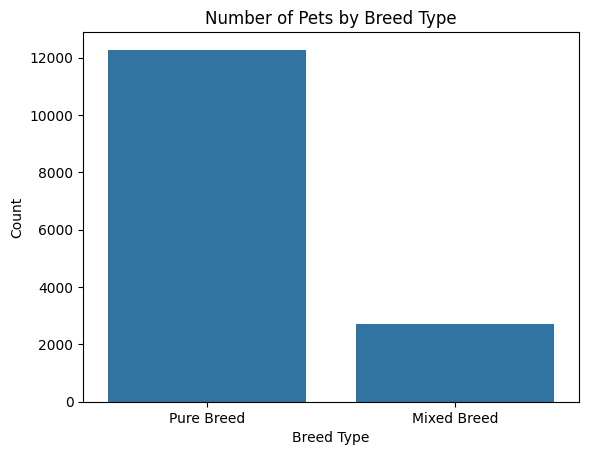

In [ ]:
def classify_breed(row):
    # Pure Breed:
    if row['Breed1'] > 0 and row['Breed1'] == row['Breed2']:
        return 'Pure Breed'
    # Pure Breed:
    elif row['Breed1'] > 0 and row['Breed2'] == 0:
        return 'Pure Breed'
    # Mixed Breed:
    elif row['Breed1'] != row['Breed2'] and row['Breed2'] > 0:
        return 'Mixed Breed'
    # return 'Mixed Breed'
    else:
        return 'Unknown'  # To handle cases where breed information is not enough

data['Breed Type'] = data.apply(classify_breed, axis=1)

# Filter the data by "Pure Breed" and "Mixed Breed"
pure_breed_data = data[data['Breed Type'] == 'Pure Breed']
mixed_breed_data = data[data['Breed Type'] == 'Mixed Breed']

# Display the data for both pure and mixed breeds
print("Pure Breed Data:")
print(pure_breed_data.head(3))

print("\nMixed Breed Data:")
print(mixed_breed_data.head(3))

# Visualize the count of Pure Breed and Mixed Breed
breed_counts = data['Breed Type'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=breed_counts.index, y=breed_counts.values)
plt.title("Number of Pets by Breed Type")
plt.xlabel("Breed Type")
plt.ylabel("Count")
plt.show()


### Comparing Adoption speed for Pure Breed and Mixed Breed

In [ ]:
pure_adoption_speed = pure_breed_data['AdoptionSpeed'].mean()
print("Average Adoption Speed for Pure breed:")
print(pure_adoption_speed)

mixed_adoption_speed = mixed_breed_data['AdoptionSpeed'].mean()
print("Average Adoption Speed for Mixed breed:")
print(mixed_adoption_speed)

Average Adoption Speed for Pure breed:
2.5582627118644066
Average Adoption Speed for Mixed breed:
2.3278206541712607


#### As it is displayed, the average adoption speed for mixed breed pets is lower than the pure breed pets.

### Clustering the features using Pure Breed data

In [ ]:
pure_features = ['Age', 'Fee', 'Quantity', 'PhotoAmt']


pure_clustering_data = pure_breed_data[pure_features]
pure_clustering_data.head()

,Age,Fee,Quantity,PhotoAmt
0,3,100,1,1.0
1,1,0,1,2.0
2,1,0,1,7.0
3,4,150,1,8.0
4,1,0,1,3.0


In [ ]:
# Normalize the features of Pure breed data
scaler = StandardScaler()
pure_scaled_data = scaler.fit_transform(pure_clustering_data)
pure_scaled_data = pd.DataFrame(pure_scaled_data, columns = pure_features)
pure_scaled_data.head()

pure_clustering_scaled = pd.DataFrame(pure_scaled_data, columns= pure_features)
pure_clustering_scaled.head()

,Age,Fee,Quantity,PhotoAmt
0,-0.401139,1.063568,-0.394912,-0.804827
1,-0.509802,-0.247125,-0.394912,-0.517066
2,-0.509802,-0.247125,-0.394912,0.921742
3,-0.346807,1.718915,-0.394912,1.209504
4,-0.509802,-0.247125,-0.394912,-0.229304


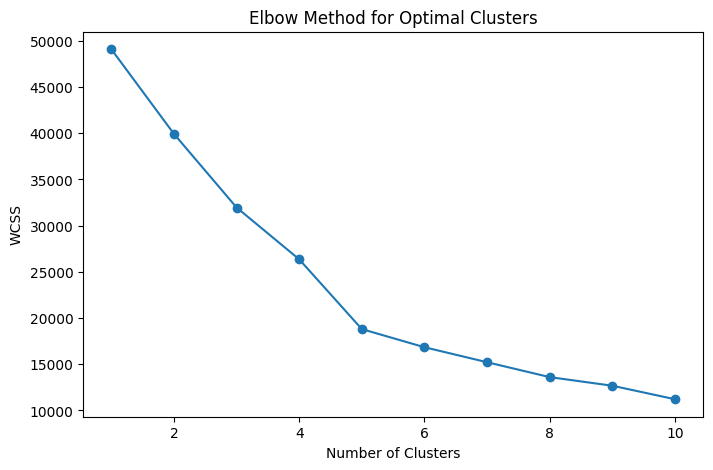

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pure_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_clusters_pure = 5
kmeans_pure = KMeans(n_clusters=optimal_clusters_pure, random_state=0, n_init = 'auto')
kmeans_pure

KMeans(n_clusters=5, random_state=0)

In [ ]:
pure_clustering_data['P_Cluster'] = kmeans_pure.fit_predict(pure_clustering_scaled)
pure_clustering_data.head(10)

<ipython-input-86-7c14a92e2481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_clustering_data['P_Cluster'] = kmeans_pure.fit_predict(pure_clustering_scaled)


,Age,Fee,Quantity,PhotoAmt,P_Cluster
0,3,100,1,1.0,0
1,1,0,1,2.0,0
2,1,0,1,7.0,0
3,4,150,1,8.0,0
4,1,0,1,3.0,0
5,3,0,1,2.0,0
6,12,300,1,3.0,2
7,0,0,6,9.0,1
8,2,0,1,6.0,0
9,12,0,1,2.0,0


In [ ]:
pure_cluster_summary = pure_clustering_data.groupby('P_Cluster').mean()
pure_cluster_summary

,Age,Fee,Quantity,PhotoAmt
P_Cluster,,,,
0,4.201188,6.600823,1.229293,3.277505
1,3.859773,5.064448,4.589943,8.182720
2,20.806818,332.322727,1.122727,3.700000
3,82.210177,14.904867,1.079646,2.935841
4,32.004115,11.107819,1.120988,2.796708


**Evaluation using Silhouette Score for Mixed Breed**

In [ ]:
silhouette_avg_kmeans_pure = silhouette_score(pure_clustering_scaled, pure_clustering_data['P_Cluster'])

print(f"Silhouette Score for K-Means for Pure breed: {silhouette_avg_kmeans_pure:.2f}")

Silhouette Score for K-Means for Pure breed: 0.40


In [ ]:
pure_clustering_data['AdoptionSpeed'] = data['AdoptionSpeed']

kmeans_adoption_speed_pure = pure_clustering_data.groupby('P_Cluster')['AdoptionSpeed'].mean()
print("Average Adoption Speed per K-Means Cluster for Pure Breed:")
print(kmeans_adoption_speed_pure)

Average Adoption Speed per K-Means Cluster for Pure Breed:
P_Cluster
0    2.493431
1    2.716006
2    2.513636
3    2.632743
4    2.830453
Name: AdoptionSpeed, dtype: float64


<ipython-input-89-3025c7bf9cfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_clustering_data['AdoptionSpeed'] = data['AdoptionSpeed']


### Clustering the features using Mixed Breed data

In [ ]:
mixed_features = ['Age', 'Fee', 'Quantity', 'PhotoAmt']


mixed_clustering_data = mixed_breed_data[mixed_features]
mixed_clustering_data.head()

,Age,Fee,Quantity,PhotoAmt
15,78,0,1,2.0
23,10,0,1,0.0
25,36,0,1,3.0
26,2,0,1,11.0
30,4,0,2,5.0


In [ ]:
# Normalize the features of Mixed breed data
scaler = StandardScaler()
mixed_scaled_data = scaler.fit_transform(mixed_clustering_data)
mixed_scaled_data = pd.DataFrame(mixed_scaled_data, columns = mixed_features)
mixed_scaled_data.head()

mixed_clustering_scaled = pd.DataFrame(mixed_scaled_data, columns= mixed_features)
mixed_clustering_scaled.head()

,Age,Fee,Quantity,PhotoAmt
0,3.960439,-0.371221,-0.376876,-0.656185
1,-0.044940,-0.371221,-0.376876,-1.225352
2,1.486529,-0.371221,-0.376876,-0.371601
3,-0.516161,-0.371221,-0.376876,1.905069
4,-0.398356,-0.371221,0.397656,0.197567


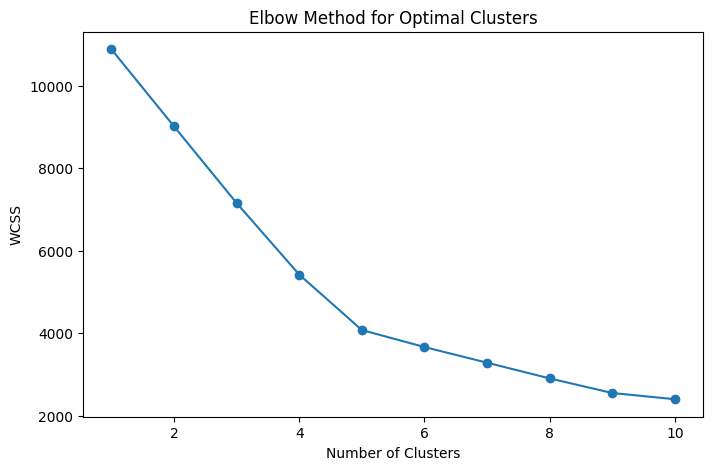

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mixed_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As expected, for both pure and mixed breed, the elbow point was identified at 5 clusters, balancing cluster compactness with interpretability. This indicates the same number of optimal clusters as the whole dataset for the chosen features.

In [ ]:
optimal_clusters_mixed = 5
kmeans_mixed = KMeans(n_clusters=optimal_clusters_mixed, random_state=0, n_init = 'auto')
kmeans_mixed

KMeans(n_clusters=5, random_state=0)

In [ ]:
mixed_clustering_data['M_Cluster'] = kmeans_mixed.fit_predict(mixed_clustering_scaled)
mixed_clustering_data.head(10)

<ipython-input-94-ab601b94ad46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_clustering_data['M_Cluster'] = kmeans_mixed.fit_predict(mixed_clustering_scaled)


,Age,Fee,Quantity,PhotoAmt,M_Cluster
15,78,0,1,2.0,2
23,10,0,1,0.0,1
25,36,0,1,3.0,1
26,2,0,1,11.0,3
30,4,0,2,5.0,1
36,24,0,3,2.0,0
40,2,0,1,13.0,3
42,24,0,6,1.0,0
43,5,0,1,6.0,1
50,1,0,2,13.0,3


In [ ]:
mixed_cluster_summary = mixed_clustering_data.groupby('M_Cluster').mean()
mixed_cluster_summary

,Age,Fee,Quantity,PhotoAmt
M_Cluster,,,,
0,5.086022,12.519713,4.394265,4.146953
1,7.625341,9.064446,1.106499,3.385582
2,68.183673,14.455782,1.183673,3.421769
3,6.334728,19.573222,1.493724,12.790795
4,10.524444,268.777778,1.164444,3.555556


**Evaluation using Silhouette Score for Mixed Breed**

In [ ]:
silhouette_avg_kmeans_mixed = silhouette_score(mixed_clustering_scaled, mixed_clustering_data['M_Cluster'])

print(f"Silhouette Score for K-Means (Mixed Breed): {silhouette_avg_kmeans_mixed:.2f}")

Silhouette Score for K-Means (Mixed Breed): 0.50


In [ ]:
mixed_clustering_data['AdoptionSpeed'] = data['AdoptionSpeed']

kmeans_adoption_speed_mixed = mixed_clustering_data.groupby('M_Cluster')['AdoptionSpeed'].mean()
print("Average Adoption Speed per K-Means Cluster for Mixed Breed:")
print(kmeans_adoption_speed_mixed)

Average Adoption Speed per K-Means Cluster for Mixed Breed:
M_Cluster
0    2.318996
1    2.276898
2    2.741497
3    2.430962
4    2.373333
Name: AdoptionSpeed, dtype: float64


<ipython-input-97-db6f5484f017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_clustering_data['AdoptionSpeed'] = data['AdoptionSpeed']


In [ ]:
# Mixed Breed Summary
print("=== Mixed Breed Clustering Summary ===")
mixed_cluster_summary = mixed_clustering_data.groupby('M_Cluster').mean()
print("\nCluster Summary (Mixed Breed):")
print(mixed_cluster_summary)

# Pure Breed Summary
print("\n\n=== Pure Breed Clustering Summary ===")
pure_cluster_summary = pure_clustering_data.groupby('P_Cluster').mean()
print("\nCluster Summary (Pure Breed):")
print(pure_cluster_summary)


=== Mixed Breed Clustering Summary ===

Cluster Summary (Mixed Breed):
                 Age         Fee  Quantity   PhotoAmt  AdoptionSpeed
M_Cluster                                                           
0           5.086022   12.519713  4.394265   4.146953       2.318996
1           7.625341    9.064446  1.106499   3.385582       2.276898
2          68.183673   14.455782  1.183673   3.421769       2.741497
3           6.334728   19.573222  1.493724  12.790795       2.430962
4          10.524444  268.777778  1.164444   3.555556       2.373333


=== Pure Breed Clustering Summary ===

Cluster Summary (Pure Breed):
                 Age         Fee  Quantity  PhotoAmt  AdoptionSpeed
P_Cluster                                                          
0           4.201188    6.600823  1.229293  3.277505       2.493431
1           3.859773    5.064448  4.589943  8.182720       2.716006
2          20.806818  332.322727  1.122727  3.700000       2.513636
3          82.210177   14.904867  1

The Silhouette scores for KMeans clustering provide insight into the internal quality of clusters for both Pure Breed and Mixed Breed groups without relying on ground truth labels. Here are the observations:

**Pure Breed Silhouette Score:**

The score for Pure Breeds is 0.40, indicating moderately dense clusters with some degree of separation.
While this suggests that the clusters are not poorly formed, there may still be some overlap or inconsistency in the grouping.

**Mixed Breed Silhouette Score:**

The score for Mixed Breeds is 0.50, which is higher than that for Pure Breeds.
This implies that clusters in the Mixed Breed data are better defined and more distinct compared to those in the Pure Breed data.

**Insights:**
The higher Silhouette score for Mixed Breeds suggests that the data for Mixed Breeds has clearer separable patterns compared to Pure Breeds.

**Evaluation using external metrics for Pure and Mixed Breed**

In [ ]:
y_pure = pure_breed_data.AdoptionSpeed
y_mixed = mixed_breed_data.AdoptionSpeed

Homogeneity Score

In [ ]:
print("Kmeans Homogeneity score of Pure Breed", metrics.homogeneity_score(y_pure, kmeans_pure.labels_))
print("Kmeans Homogeneity score of Mixed Breed", metrics.homogeneity_score(y_mixed, kmeans_mixed.labels_))

Kmeans Homogeneity score of Pure Breed 0.0059293764941421015
Kmeans Homogeneity score of Mixed Breed 0.008297329233421129


Completeness Score

In [ ]:
print("Kmeans Completeness score of Pure Breed", metrics.completeness_score(y_pure, kmeans_pure.labels_))
print("Kmeans Completeness score of Mixed Breed", metrics.completeness_score(y_mixed, kmeans_mixed.labels_))

Kmeans Completeness score of Pure Breed 0.00896775309590967
Kmeans Completeness score of Mixed Breed 0.011567803338293716


V-Measure Score

In [ ]:
print("Kmeans V-measure score of Pure Breed", metrics.v_measure_score(y_pure, kmeans_pure.labels_))
print("Kmeans V-measure score of Mixed Breed", metrics.v_measure_score(y_mixed, kmeans_mixed.labels_))

Kmeans V-measure score of Pure Breed 0.007138715427120355
Kmeans V-measure score of Mixed Breed 0.009663350844379028


The clustering results for Pure Breed and Mixed Breed using KMeans show poor performance in identifying meaningful patterns for the AdoptionSpeed classes.

- **Homogeneity:**
Pure Breed clusters have a homogeneity score of 0.0059, while Mixed Breed clusters perform slightly better at 0.0083.
This indicates that many clusters contain pets from multiple AdoptionSpeed classes, showing weak separation of the true classes.

- **Completeness:**
The completeness scores are 0.0090 for Pure Breed and 0.0116 for Mixed Breed.
These low scores suggest that pets from the same AdoptionSpeed class are scattered across different clusters, resulting in a lack of cohesion within each class.

- **V-measure:**
The V-measure scores are 0.0071 for Pure Breed and 0.0097 for Mixed Breed, combining the limitations of both homogeneity and completeness.
The slightly better performance for Mixed Breeds hints at marginally clearer patterns compared to Pure Breeds, but both results remain inadequate.

- **Insights:**
Mixed Breeds show marginally better clustering results than Pure Breeds, implying that their AdoptionSpeed patterns might be somewhat easier to detect. However, neither group achieves a satisfactory level of clustering performance.
The features used do not provide enough separation between AdoptionSpeed classes, making it difficult for KMeans to produce meaningful clusters.

## 2.3. Clustering - Final Discussion and Conclusions

#### Based on the clustering analysis conducted using both K-Means and Hierarchical Clustering, the following key insights were derived:

- **Feature Selection Impact:**

    - The chosen features (Age, Fee, Quantity, and PhotoAmt) effectively captured key aspects of pet listings, providing meaningful groupings of pets based on their characteristics. Standardization ensured a fair contribution of each feature to clustering results.

- **K-Means vs. Hierarchical Clustering:**

    - K-Means consistently outperformed Hierarchical Clustering across all intrinsic metrics (Silhouette Score, Calinski-Harabasz, Davies-Bouldin), indicating better-defined and more distinct clusters.
    - The optimal number of clusters was identified as five for both methods, but K-Means demonstrated greater compactness and separation of clusters.

- **Cluster Interpretations:**

    - Certain clusters reflected clear trends, such as younger pets with more photos being associated with faster adoption speeds, and older pets with higher fees corresponding to slower adoption rates.
    - Clusters captured the diverse adoption factors, including pricing, age, and presentation quality (PhotoAmt), providing actionable insights for stakeholders.

- **Adoption Speed Analysis:**

    - By integrating the AdoptionSpeed variable, a clear relationship emerged between cluster attributes and adoption outcomes. This analysis highlighted opportunities to target specific groups of pets for interventions, such as discounts or improved photo quality.

#### In conclusion, K-Means emerged as the preferred clustering method, and the identified clusters provided actionable insights into the factors influencing adoption rates. These insights can guide targeted interventions for improving adoption outcomes

## 3. Final Comments and Conclusions

#### Using both supervised and unsupervised learning approaches, this study offered a thorough examination of the variables affecting pet adoption results, providing useful insights from data preprocessing to clustering analysis and predictive modeling.

- **Data Preprocessing:**

  - The dataset was cleaned and transformed to guarantee reliable input for supervised learning and clustering. To accommodate different scales, characteristics were normalized and missing values were imputed. Principal Component Analysis (PCA), which reduces dimensionality, improved the display and interpretability of clustering results.

- **Feature Selection and Engineering:**

    - Important characteristics including Breed, Age, Fee, and PhotoAmt were crucial for grouping and predictive modeling. These features highlighted the importance of pet-specific traits and listing quality, capturing the key elements influencing adoption patterns.


- **Insights from Clustering:**

    - Different pet groups with similar traits were identified by clustering. For instance, older pets with higher fees created clusters linked to slower adoption, whereas younger pups with more images typically formed clusters with faster adoption speeds.

    - Intrinsic metrics such as Calinski-Harabasz indices and Silhouette Scores showed that K-Means clustering performed better than Hierarchical Clustering in group separation. In addition to the predictions made by supervised learning models, these groups provide a more thorough insight of adoption trends.

- **Predictive Modeling:**

    - AdoptionSpeed was correctly predicted by supervised learning models, with the greatest results coming from Gradient Boosting Machines (like XGBoost). These models provided useful tools for anticipating adoption outcomes by utilizing the same features to provide predictions at the individual level.
    - Cross-validation and hyperparameter tuning were used to guarantee the models' generalizability and dependability, enabling decision-making with accurate, data-driven insights.

- **Integrated Insights:**

    - Predictive modeling and clustering together offered a comprehensive understanding of adoption patterns. While supervised models provided in-depth individual predictions, clustering enhanced the study by spotting group-level trends. When combined, these techniques revealed areas that may be improved in a practical way, including changing pricing or improving the quality of photos for particular pet groups.


- **Real-World Applications:**

    - The results have immediate implications for shelters and adoption sites. For example, pinpointing slower-adopting clusters enables targeted actions, such enhanced listing visibility or promotional discounts. Resources for pets with a higher chance of being adopted later can be prioritized with the use of predictive models.

- **Evaluation Metrics and Quality Assurance:**

    - Using pertinent measures, supervised learning and clustering were both thoroughly assessed. Clustering quality was confirmed by both intrinsic and extrinsic measures, and the best prediction models were chosen based on accuracy and interpretability. The reliability and significance of the analysis were guaranteed by this twofold examination.

#### This study shows how well machine learning approaches may be combined to solve challenging real-world problems. It provides a strong framework for comprehending and enhancing pet adoption outcomes by combining clustering analysis with predictive modeling, and it adds useful tools to help shelters in their endeavor to find homes for all pets.